<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Outliers" data-toc-modified-id="Outliers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Features" data-toc-modified-id="Features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Features</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>EDA</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#OLS" data-toc-modified-id="OLS-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>OLS</a></span></li><li><span><a href="#LASSO" data-toc-modified-id="LASSO-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>LASSO</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Elastic Net</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Bagging" data-toc-modified-id="Bagging-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Bagging</a></span></li><li><span><a href="#Regression-Tree" data-toc-modified-id="Regression-Tree-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Regression Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#XGB" data-toc-modified-id="XGB-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>XGB</a></span></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Neural Network</a></span></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Stacking</a></span></li></ul></li><li><span><a href="#Submission" data-toc-modified-id="Submission-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Submission</a></span></li></ul></div>

In [1]:
# packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb

from scipy import stats, special
from scipy.stats import skew
from scipy.special import boxcox1p

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from mlxtend.regressor import StackingCVRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from  keras.wrappers.scikit_learn import KerasRegressor

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


# Outliers

In [24]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape)
print(df_test.shape)

(1570, 81)
(1210, 80)


In [25]:
df_train = df_train.drop(['Train_ID'],axis=1)
df_test = df_test.drop(['Test_ID'],axis=1)

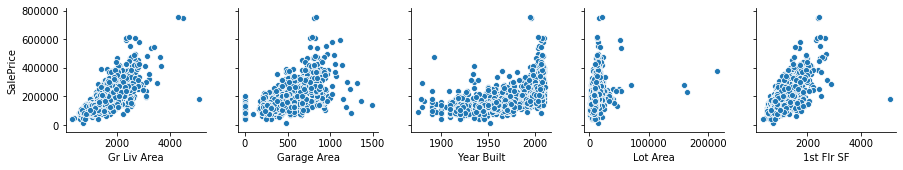

In [26]:
sns.pairplot(df_train,
            y_vars=['SalePrice'],
            x_vars=['Gr Liv Area', 'Garage Area', 'Year Built', 'Lot Area','1st Flr SF'])

In [27]:
df_train.sort_values('Gr Liv Area', ascending=False)[:2] # same outlier, drop

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
201           20        RL         128.0     39290   Pave   NaN       IR1   
258           60        RL         160.0     15623   Pave   NaN       IR1   

    Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
201          Bnk    AllPub     Inside  ...         0     NaN    NaN   
258          Lvl    AllPub     Corner  ...       555      Ex  MnPrv   

    Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
201         Elev    17000      10     2007        New         Partial   
258          NaN        0       7     2007        WD          Abnorml   

     SalePrice  
201     183850  
258     745000  

[2 rows x 80 columns]

In [28]:
df_train.sort_values('1st Flr SF', ascending=False)[:2]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
201           20        RL         128.0     39290   Pave   NaN       IR1   
550           20        RL           NaN     15498   Pave   NaN       IR1   

    Land Contour Utilities Lot Config  ... Pool Area Pool QC Fence  \
201          Bnk    AllPub     Inside  ...         0     NaN   NaN   
550          Lvl    AllPub     Corner  ...         0     NaN   NaN   

    Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
201         Elev    17000      10     2007        New         Partial   
550          NaN        0       5     2008        COD         Abnorml   

     SalePrice  
201     183850  
550     287000  

[2 rows x 80 columns]

In [29]:
df_train.drop([201], inplace=True)

# Missing Values

In [30]:
# add split index and concat
df_train['split'] = 1
df_test['split'] = 2
df_concat = pd.concat([df_train,df_test],sort = False)
print(df_concat.shape)
df_concat.head()

(2779, 81)


MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           20        RL           NaN     50102   Pave   NaN       IR1   
1           60        RL          93.0     10261   Pave   NaN       IR1   
2           50        RL          55.0      7264   Pave   NaN       Reg   
3          120        RL          48.0      3242   Pave   NaN       Reg   
4           60        RL          70.0     11207   Pave   NaN       IR1   

  Land Contour Utilities Lot Config  ... Pool QC Fence Misc Feature Misc Val  \
0          Low    AllPub     Inside  ...     NaN   NaN          NaN        0   
1          Lvl    AllPub     Inside  ...     NaN   NaN          NaN        0   
2          Lvl    AllPub     Inside  ...     NaN   NaN          NaN        0   
3          Lvl    AllPub     Inside  ...     NaN   NaN          NaN        0   
4          HLS    AllPub        FR2  ...     NaN   NaN          NaN        0   

  Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  split  
0       3    2006        WD           Alloca   250764.0      1  
1       5    2008        WD           Normal   186500.0      1  
2      10    2009        WD           Normal   205000.0      1  
3       3    2007        WD           Normal   200000.0      1  
4       6    2006        WD           Normal   185000.0      1  

[5 rows x 81 columns]

In [31]:
# check datatypes: 38 nummerical, 43 object
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2779 entries, 0 to 1209
Data columns (total 81 columns):
MS SubClass        2779 non-null int64
MS Zoning          2779 non-null object
Lot Frontage       2309 non-null float64
Lot Area           2779 non-null int64
Street             2779 non-null object
Alley              189 non-null object
Lot Shape          2779 non-null object
Land Contour       2779 non-null object
Utilities          2779 non-null object
Lot Config         2779 non-null object
Land Slope         2779 non-null object
Neighborhood       2779 non-null object
Condition 1        2779 non-null object
Condition 2        2779 non-null object
Bldg Type          2779 non-null object
House Style        2779 non-null object
Overall Qual       2779 non-null int64
Overall Cond       2779 non-null int64
Year Built         2779 non-null int64
Year Remod/Add     2779 non-null int64
Roof Style         2779 non-null object
Roof Matl          2779 non-null object
Exterior 1st       

In [32]:
# detect missing value
Missing_values = df_concat.isna().sum().sort_values(ascending=False, inplace=False)
dict_Missing_values = {'Variables':Missing_values.index,'Counts':Missing_values.values}
df_Missing_values = pd.DataFrame(dict_Missing_values)
df_Missing_values.index = np.arange(1, len(df_Missing_values)+1)
df_Missing_values.head(30)

Variables  Counts
1          Pool QC    2767
2     Misc Feature    2677
3            Alley    2590
4            Fence    2241
5     Fireplace Qu    1345
6        SalePrice    1210
7     Lot Frontage     470
8    Garage Finish     154
9    Garage Yr Blt     154
10     Garage Cond     154
11     Garage Qual     154
12     Garage Type     152
13   Bsmt Exposure      77
14  BsmtFin Type 2      75
15  BsmtFin Type 1      74
16       Bsmt Cond      74
17       Bsmt Qual      74
18    Mas Vnr Type      22
19    Mas Vnr Area      22
20  Bsmt Half Bath       2
21  Bsmt Full Bath       2
22     Garage Area       1
23     Garage Cars       1
24   Total Bsmt SF       1
25     Bsmt Unf SF       1
26    BsmtFin SF 2       1
27      Electrical       1
28    BsmtFin SF 1       1
29      Exter Qual       0
30    Exterior 2nd       0

Text(0.5, 1.0, 'Percent missing data by feature')

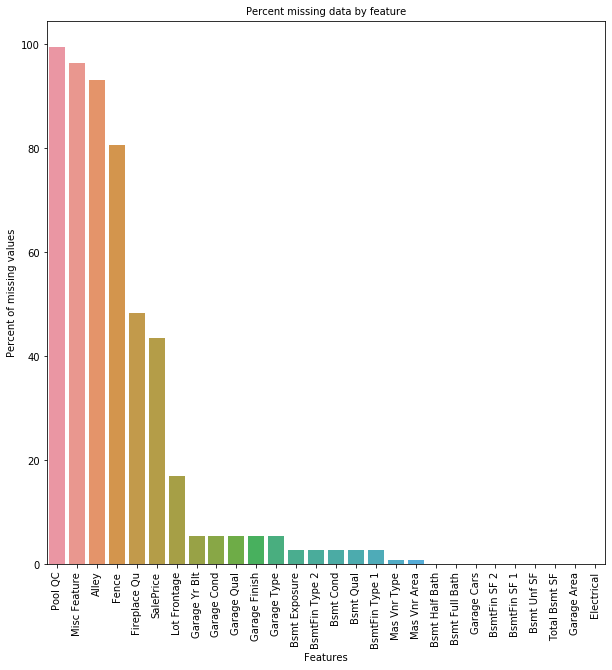

In [33]:
# na pct
df_na = (df_concat.isnull().sum() / len(df_concat)) * 100
df_na.drop(df_na[df_na==0].index,inplace=True)
df_na = df_na.sort_values(ascending=False)
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation='90')
sns.barplot(x=df_na.index, y=df_na)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of missing values', fontsize=10)
plt.title('Percent missing data by feature', fontsize=10)

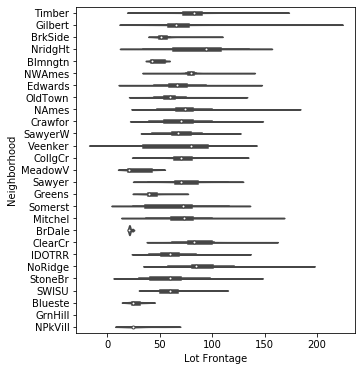

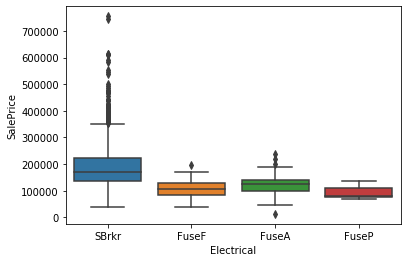

In [34]:
# tackle 'NA'
# 1. 'NA' = 'None'
fill_na_none = ['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu',
                'Garage Qual','Garage Finish','Garage Cond','Garage Type',
                'Bsmt Exposure','Bsmt Cond','Bsmt Qual','BsmtFin Type 1','BsmtFin Type 2',
                'Mas Vnr Type']
for x in fill_na_none: 
    df_concat[x].fillna('None',inplace=True)
    
# 2. fillna with median
df_concat['Lot Frontage'] = df_concat.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))
# justify <- group by neighborhood
fig, ax = plt.subplots(figsize=(5,6))
ax = sns.violinplot('Lot Frontage', 'Neighborhood', data=df_train)
plt.show()

# 3. fillna with 0
fill_na_0 = ['Garage Yr Blt', 'Garage Area', 'Garage Cars',
             'Mas Vnr Area',
             'Bsmt Full Bath','Bsmt Half Bath', 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF', 'Total Bsmt SF']
for x in fill_na_0: 
    df_concat[x].fillna(0,inplace=True)
    
# 4. fillna with mode
mode_Electrical = df_concat['Electrical'].value_counts().sort_values(ascending=False).index[0]
df_concat['Electrical'] = df_concat['Electrical'].fillna(mode_Electrical)
# justify <- why use mode
sns.boxplot('Electrical', 'SalePrice', data=df_train)

In [35]:
# still have missing values in Lot Frontage -> fill with median o each set
Missing_values1 = df_concat.isna().sum().sort_values(ascending=False, inplace=False)
dict_Missing_values1 = {'Variables':Missing_values1.index,'Counts':Missing_values1.values}
df_Missing_values1 = pd.DataFrame(dict_Missing_values1)
df_Missing_values1.index = np.arange(1, len(df_Missing_values1)+1)
df_Missing_values1.head()

Variables  Counts
1     SalePrice    1210
2  Lot Frontage       3
3     Bsmt Cond       0
4  Exterior 1st       0
5  Exterior 2nd       0

In [36]:
train = df_concat.loc[df_concat['split'] == 1]
test = df_concat.loc[df_concat['split'] == 2]
train['Lot Frontage'] = train['Lot Frontage'].fillna(train['Lot Frontage'].median())
test['Lot Frontage'] = test['Lot Frontage'].fillna(test['Lot Frontage'].median())

# Feature Engineering

## Features

Numerical to categorical

In [37]:
df_concat = pd.concat([train,test],sort = False)

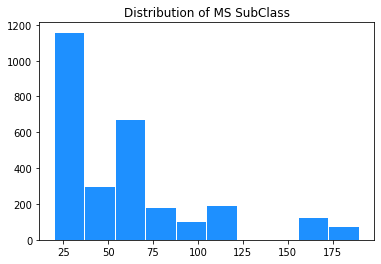

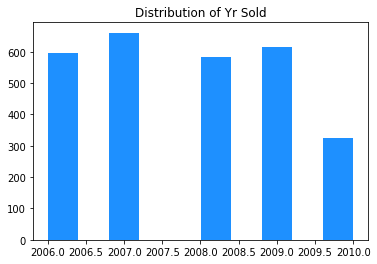

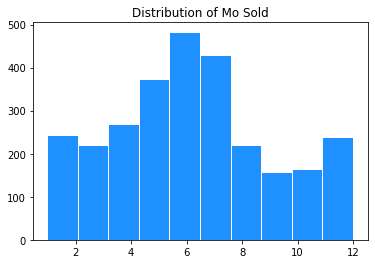

In [38]:
# MS SubClass
plt.figure()
plt.hist(df_concat.loc[:,'MS SubClass'].values,rwidth=0.968,color='dodgerblue')
plt.title('Distribution of MS SubClass')
plt.show()

# justfy -> why yr sold as categorical
plt.figure()
plt.hist(df_concat.loc[:,'Yr Sold'].values,rwidth=0.968,color='dodgerblue')
plt.title('Distribution of Yr Sold')
plt.show()

# Mo Sold
plt.figure()
plt.hist(df_concat.loc[:,'Mo Sold'].values,rwidth=0.967,color='dodgerblue')
plt.title('Distribution of Mo Sold')
plt.show()

In [39]:
df_concat['MS SubClass'] = df_concat['MS SubClass'].apply(str)
df_concat['Yr Sold'] = df_concat['Yr Sold'].apply(str)
df_concat['Mo Sold'] = df_concat['Mo Sold'].apply(str)

Bool to int

In [40]:
df_concat['Central Air'].head()

0    Y
1    Y
2    N
3    Y
4    Y
Name: Central Air, dtype: object

In [41]:
df_concat['Central Air'] = df_concat['Central Air'].map({'N':0,'Y':1})
df_concat['Central Air'].head()

0    1
1    1
2    0
3    1
4    1
Name: Central Air, dtype: int64

Ordinal

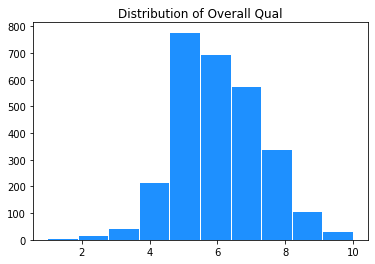

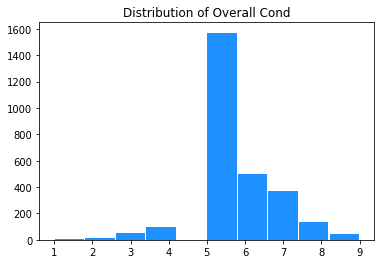

In [42]:
# Overall Qual
plt.figure()
plt.hist(df_concat.loc[:,'Overall Qual'].values,rwidth=0.967, color='dodgerblue')
plt.title('Distribution of Overall Qual')
plt.show()

# Overall Cond
plt.figure()
plt.hist(df_concat.loc[:,'Overall Cond'].values,rwidth=0.967, color='dodgerblue')
plt.title('Distribution of Overall Cond')
plt.show()

In [43]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['price_mean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    # 上述 groupby()操作可以将某一feature下同一取值的数据整合到一起，结合mean()可以直接得到该特征不同取值的房价均值
    ordering = ordering.sort_values('price_mean')
    ordering['order'] = range(1, ordering.shape[0]+1)
    ordering = ordering['order'].to_dict()
    return ordering

ord_cols = ['Overall Cond','Overall Qual','Exter Qual','Exter Cond', 'Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1',
            'BsmtFin Type 2','Heating QC','Kitchen Qual','Fireplace Qu','Garage Finish', 'Garage Qual', 'Garage Cond','Fence','Pool QC']

for x in ord_cols:
    map_d = encode(train,x)
    df_concat[x] = df_concat[x].map(map_d)
    
print(df_concat.shape)

(2779, 81)


Create features

In [44]:
df_concat['TotalSF'] = df_concat['Total Bsmt SF'] +df_concat['1st Flr SF'] + df_concat['2nd Flr SF']

Dummies

In [45]:
df_concat.dtypes.sort_values(ascending = False).head(35)

MS SubClass        object
Neighborhood       object
Foundation         object
Mas Vnr Type       object
Functional         object
Exterior 2nd       object
Exterior 1st       object
Garage Type        object
Roof Matl          object
Roof Style         object
House Style        object
Bldg Type          object
Condition 2        object
Electrical         object
Paved Drive        object
Condition 1        object
Land Slope         object
Misc Feature       object
MS Zoning          object
Sale Condition     object
Sale Type          object
Lot Config         object
Mo Sold            object
Yr Sold            object
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Heating            object
Lot Frontage      float64
Mas Vnr Area      float64
BsmtFin SF 1      float64
BsmtFin SF 2      float64
Bsmt Unf SF       float64
dtype: object

In [46]:
cat_col = [x for x in df_concat.columns if df_concat.dtypes[x] == 'object']
numerical_features = [col for col in df_concat.columns if col not in cat_col and col not in ord_cols]

num_feat = []
for i in range(32):
    num_feat.append(numerical_features[i])
num_feat.append('TotalSF')

## EDA

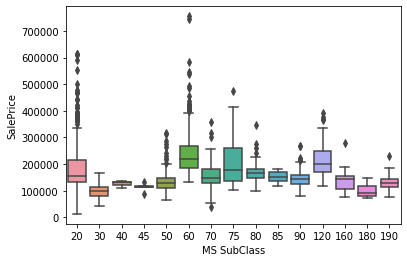

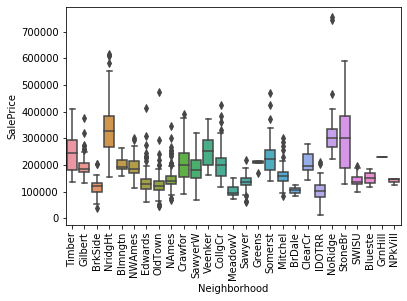

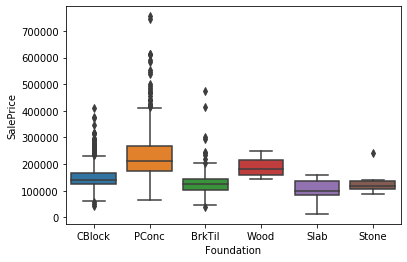

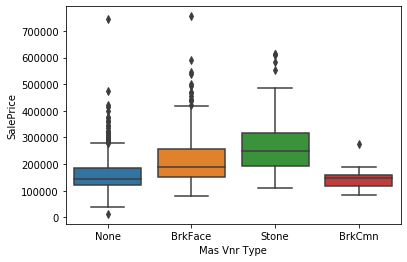

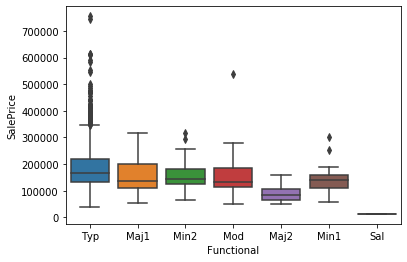

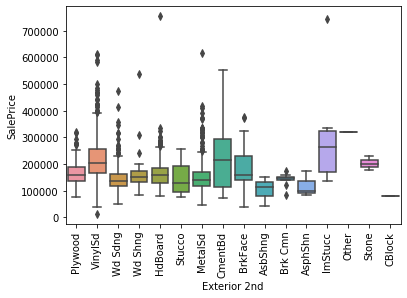

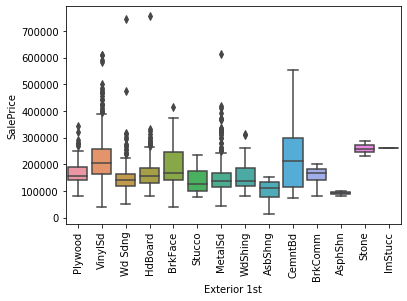

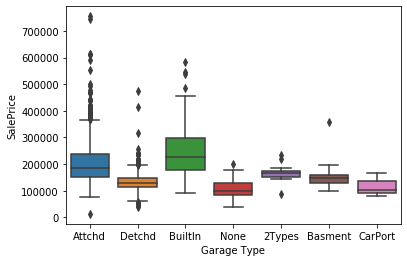

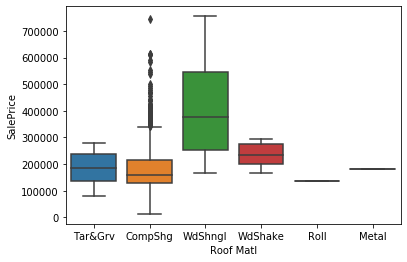

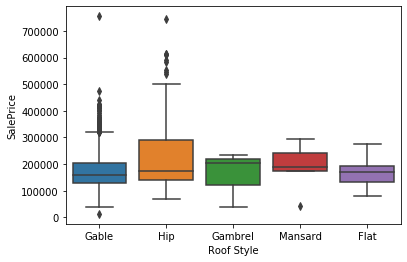

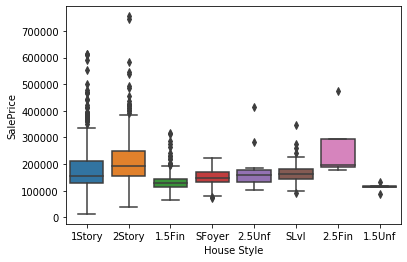

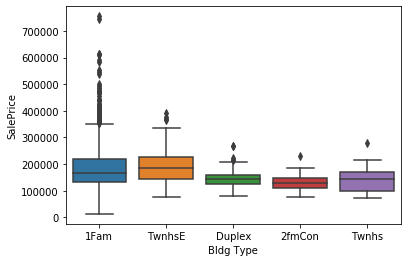

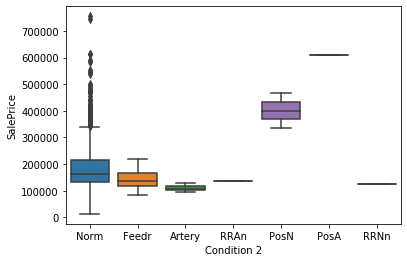

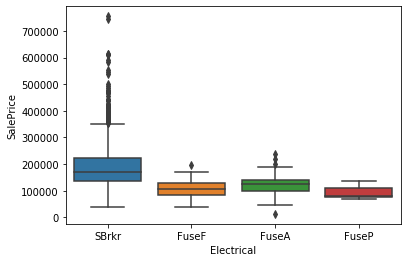

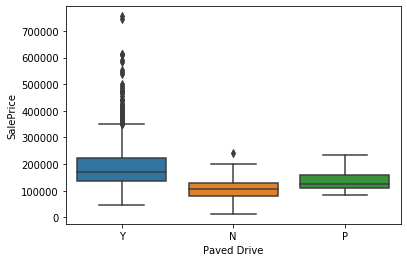

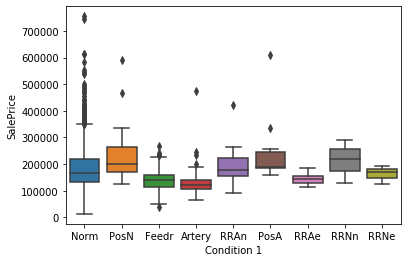

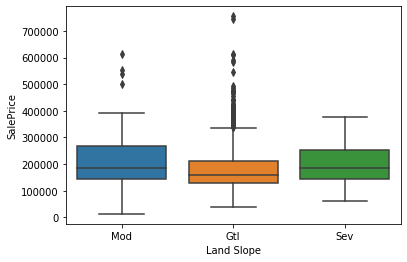

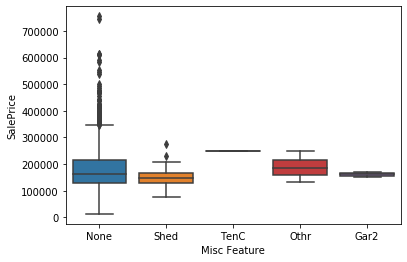

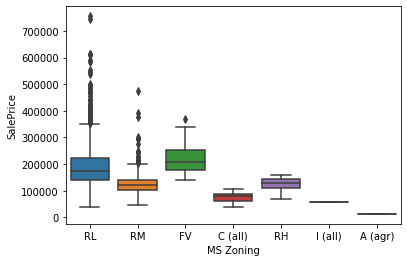

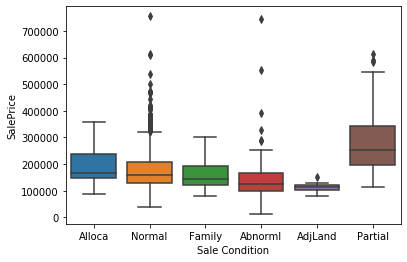

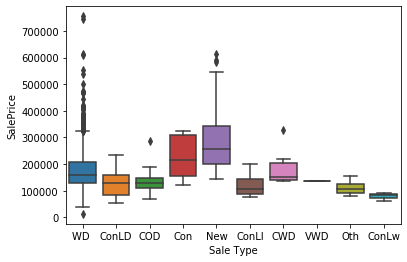

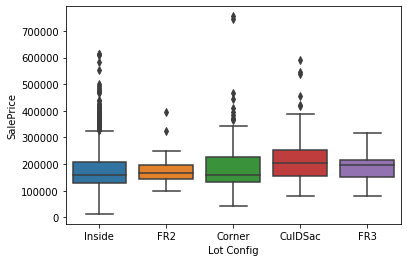

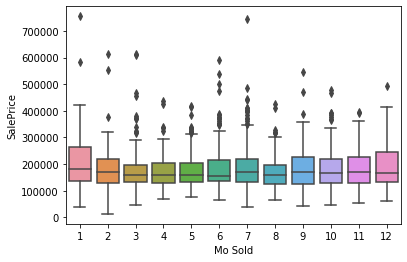

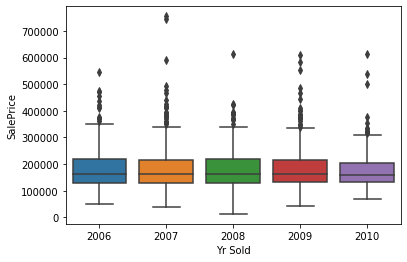

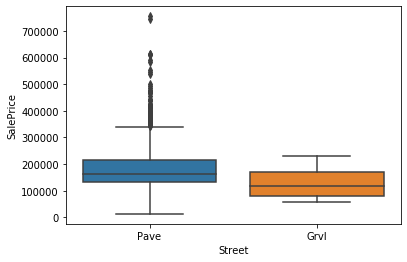

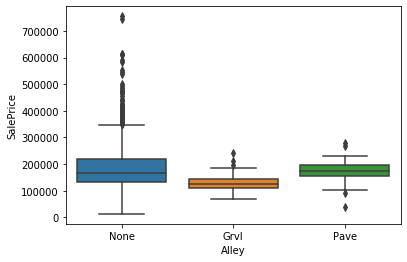

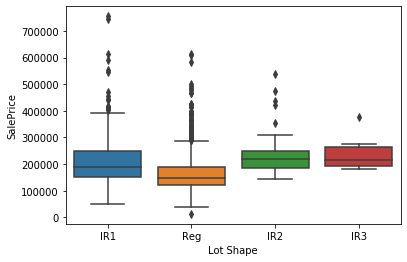

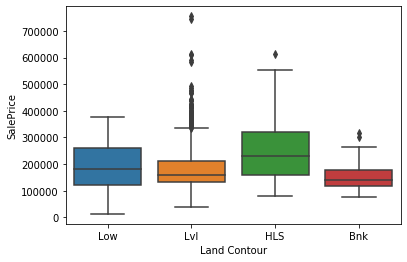

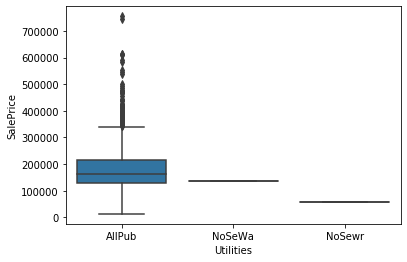

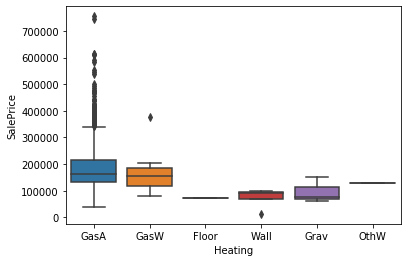

In [47]:
# categorical -> check, then get dummies
ax = sns.boxplot('MS SubClass','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Neighborhood','SalePrice',data=train)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

ax = sns.boxplot('Foundation','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Mas Vnr Type','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Functional','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Exterior 2nd','SalePrice',data=train)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

ax = sns.boxplot('Exterior 1st','SalePrice',data=train)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

ax = sns.boxplot('Garage Type','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Roof Matl','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Roof Style','SalePrice',data=train)
plt.show()

ax = sns.boxplot('House Style','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Bldg Type','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Condition 2','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Electrical','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Paved Drive','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Condition 1','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Land Slope','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Misc Feature','SalePrice',data=train)
plt.show()

ax = sns.boxplot('MS Zoning','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Sale Condition','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Sale Type','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Lot Config','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Mo Sold','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Yr Sold','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Street','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Alley','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Lot Shape','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Land Contour','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Utilities','SalePrice',data=train)
plt.show()

ax = sns.boxplot('Heating','SalePrice',data=train)
plt.show()

In [48]:
def plot_histograms(X):

    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/3)) 

    fig, axes = plt.subplots(rows, 3, figsize=(12, rows*(12/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.distplot(X.iloc[:,i], ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black'},  
                kde_kws={'color': 'black', 'alpha': 0.7})
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(labels[i])
            ax.set_yticks([])
            ax.set_xticks([])
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()
    
    return fig, axes

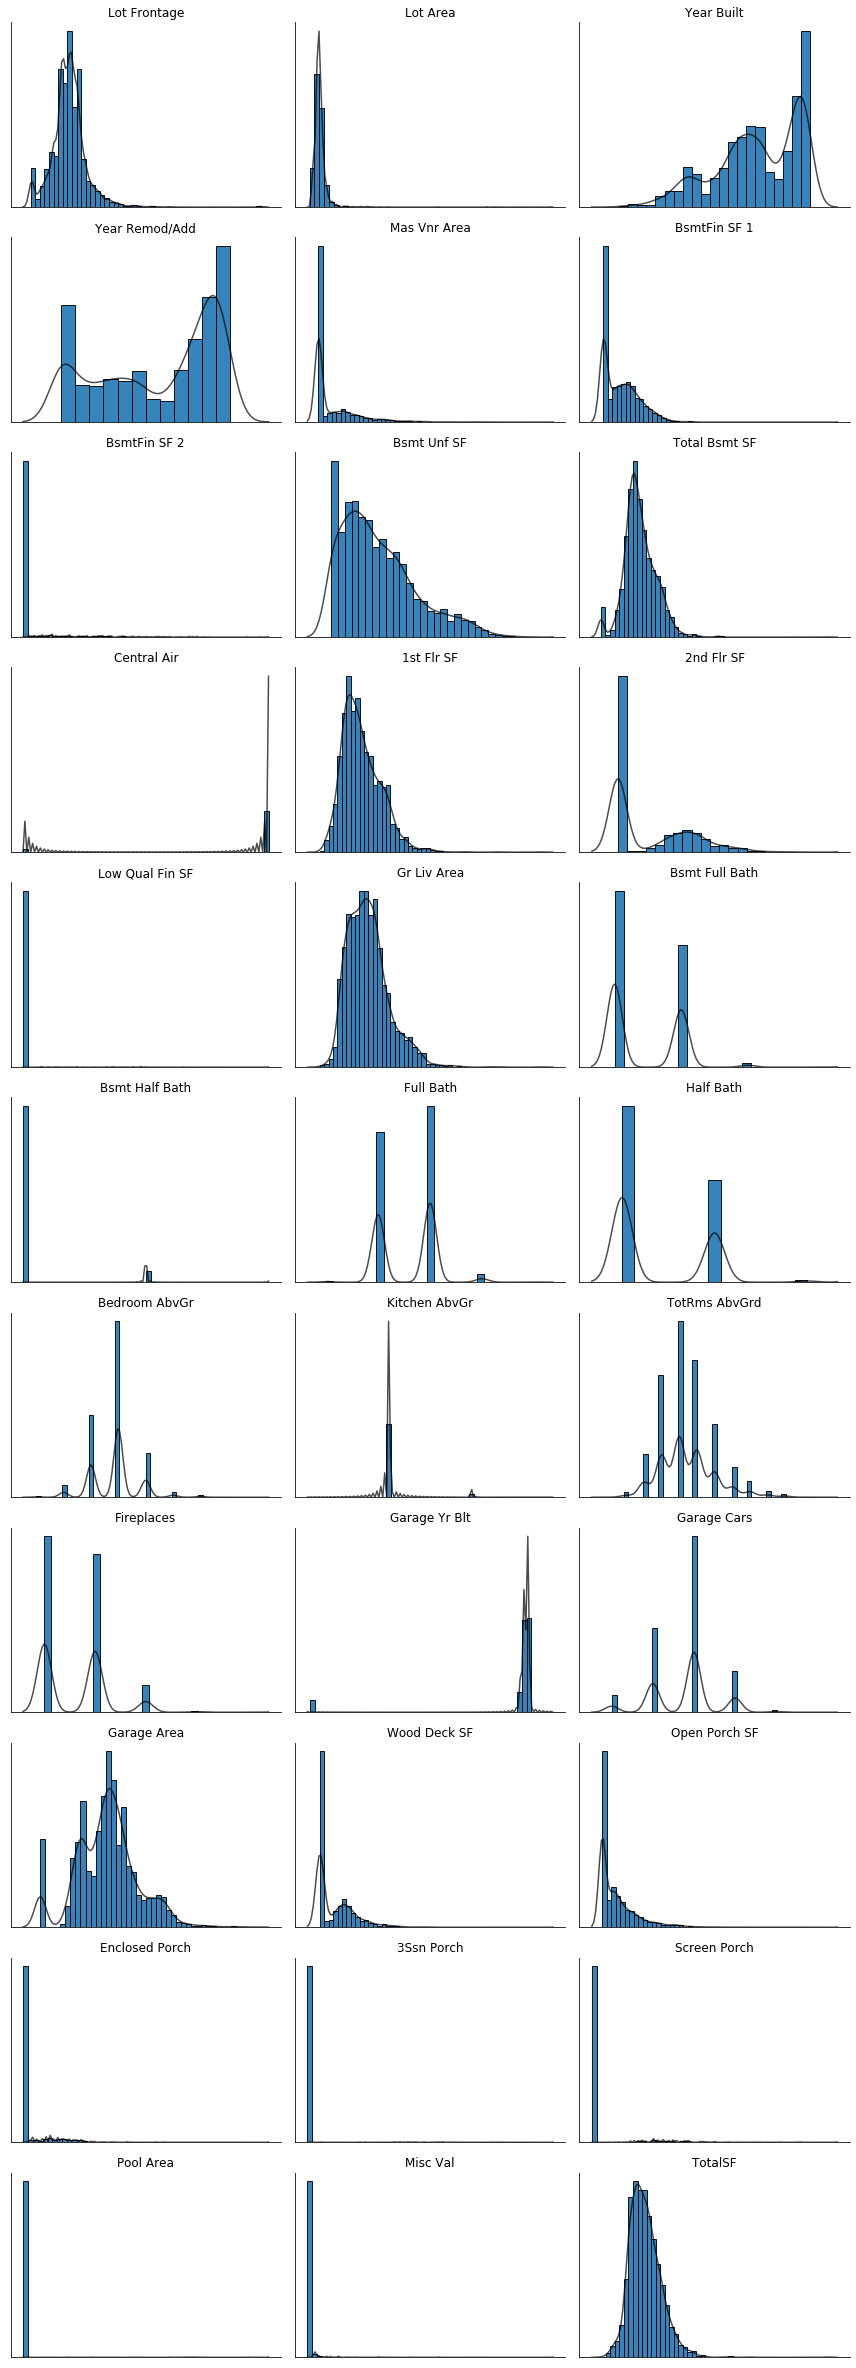

In [49]:
# Numerical
plot_histograms(df_concat[num_feat])
plt.show()

In [50]:
df_concat=pd.get_dummies(df_concat,columns=cat_col,drop_first=True)
df_concat.shape

(2779, 251)

numerical log1p

There are 23 skewed numerical features to transform


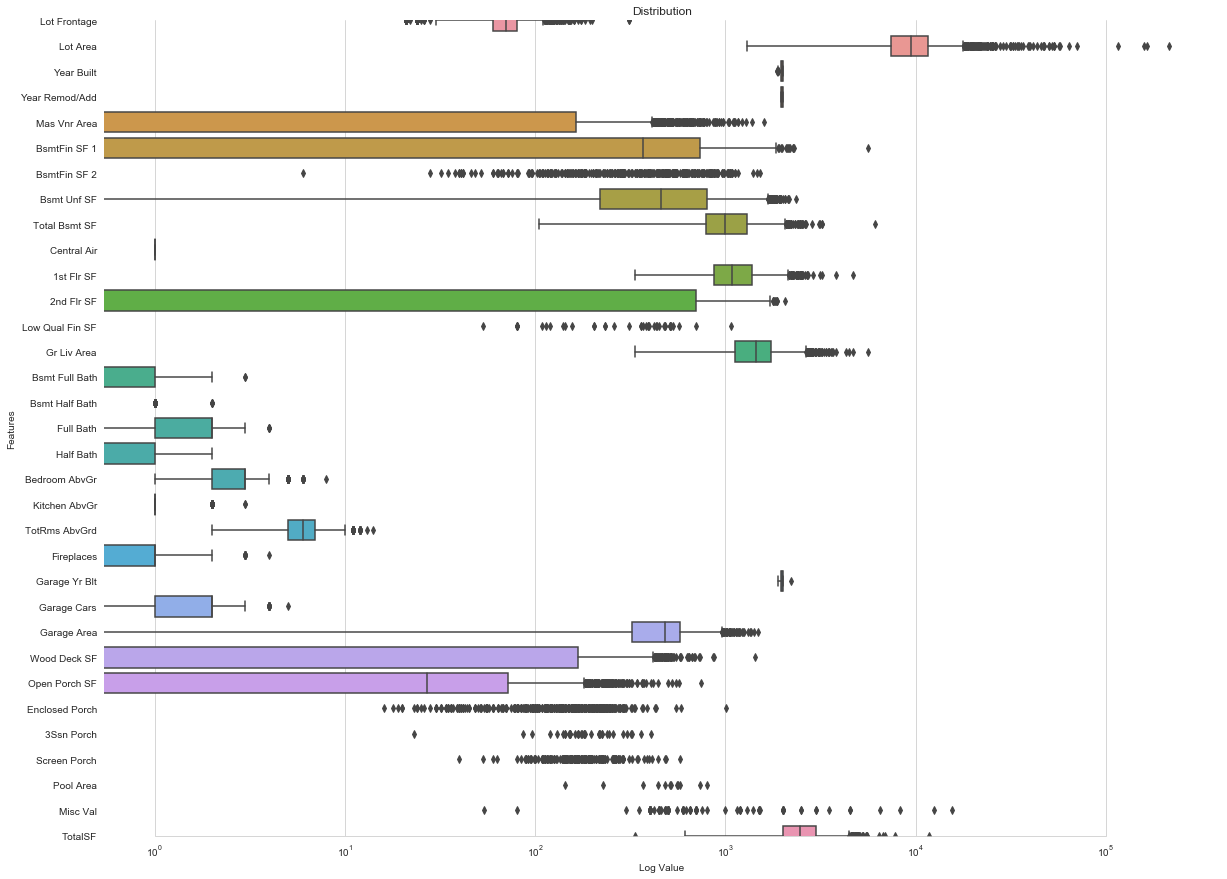

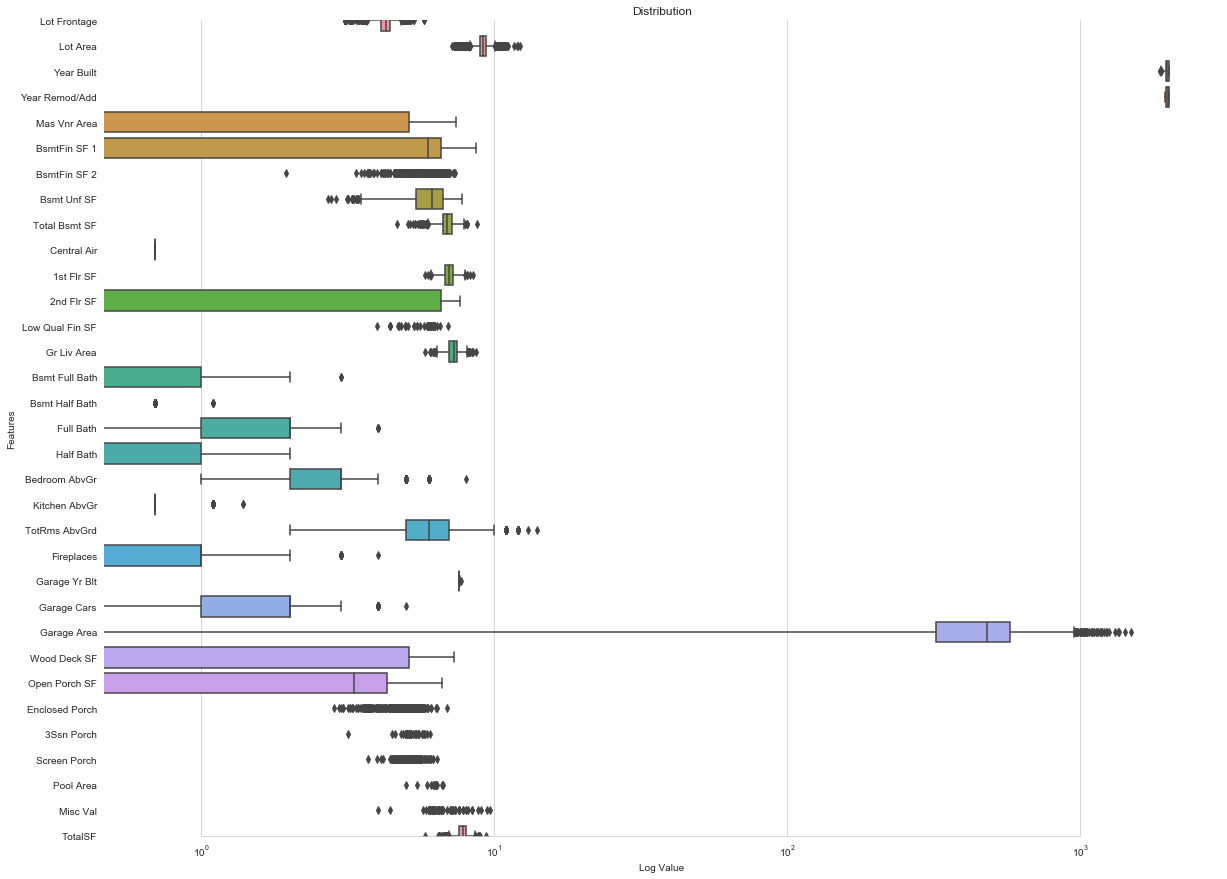

In [51]:
# Boxplot for numerical features before log1p transform
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20, 15))
ax.set_xscale("log")
ax = sns.boxplot(data=df_concat[num_feat],orient='h')
ax.set(ylabel="Features")
ax.set(xlabel="Log Value")
ax.set(title="Distribution")
sns.despine(trim=True, left=True)

# skewness
skewness = df_concat[num_feat].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_features = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to transform".format(skewed_features.shape[0]))

# log1p
df_concat[skewed_features.index] = np.log1p(df_concat[skewed_features.index])

# Boxplot for numerical features after log1p transform
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20, 15))
ax.set_xscale("log")
ax = sns.boxplot(data=df_concat[num_feat],orient='h')
ax.set(ylabel="Features")
ax.set(xlabel="Log Value")
ax.set(title="Distribution")
sns.despine(trim=True, left=True)

In [52]:
train = df_concat.loc[df_concat['split'] == 1]
test = df_concat.loc[df_concat['split'] == 2]

Correlation & Multicolinearity

In [53]:
corr = train.corr().sort_values(['SalePrice'],axis=0, ascending = False)
price_corr = corr.loc[:,'SalePrice'].dropna()
Price_corr = {'Variables':price_corr.index,'Price_corr':price_corr.values}
Price_corr = pd.DataFrame(Price_corr).drop(0)
Price_corr

Variables  Price_corr
1          Overall Qual    0.799648
2               TotalSF    0.774573
3           Gr Liv Area    0.707765
4            Exter Qual    0.700630
5          Kitchen Qual    0.669813
..                  ...         ...
235        MS Zoning_RM   -0.277534
236       Lot Shape_Reg   -0.281425
237   Foundation_CBlock   -0.352964
238  Garage Type_Detchd   -0.361401
239   Mas Vnr Type_None   -0.386265

[239 rows x 2 columns]

In [54]:
corr_selected = price_corr.loc[(price_corr>=0.2)|(price_corr<=-0.2)]
corr_selected

SalePrice             1.000000
Overall Qual          0.799648
TotalSF               0.774573
Gr Liv Area           0.707765
Exter Qual            0.700630
                        ...   
MS Zoning_RM         -0.277534
Lot Shape_Reg        -0.281425
Foundation_CBlock    -0.352964
Garage Type_Detchd   -0.361401
Mas Vnr Type_None    -0.386265
Name: SalePrice, Length: 61, dtype: float64

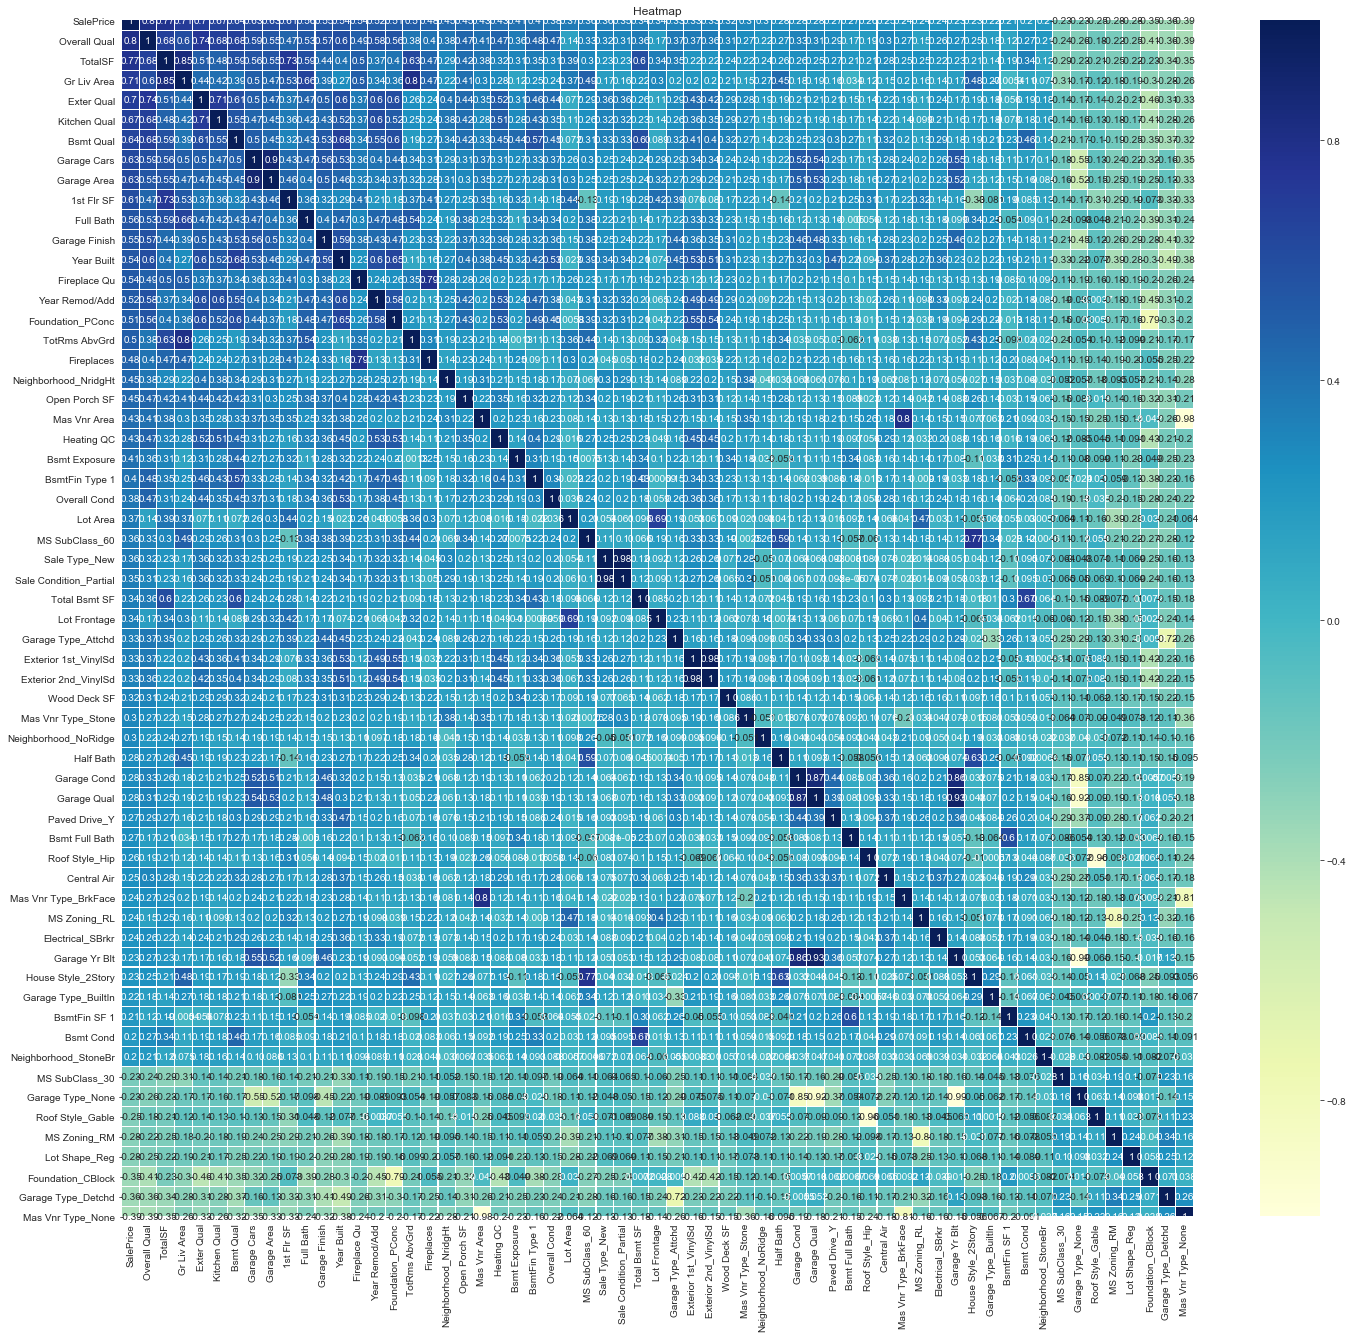

In [55]:
heatmap = train.loc[:,corr_selected.index].astype(float)

colormap = plt.cm.RdBu
plt.figure(figsize = (24,22))
sns.heatmap(heatmap.astype(float).corr(),linewidths = 0.1,annot = True,cmap="YlGnBu")
plt.title('Heatmap')
plt.show()

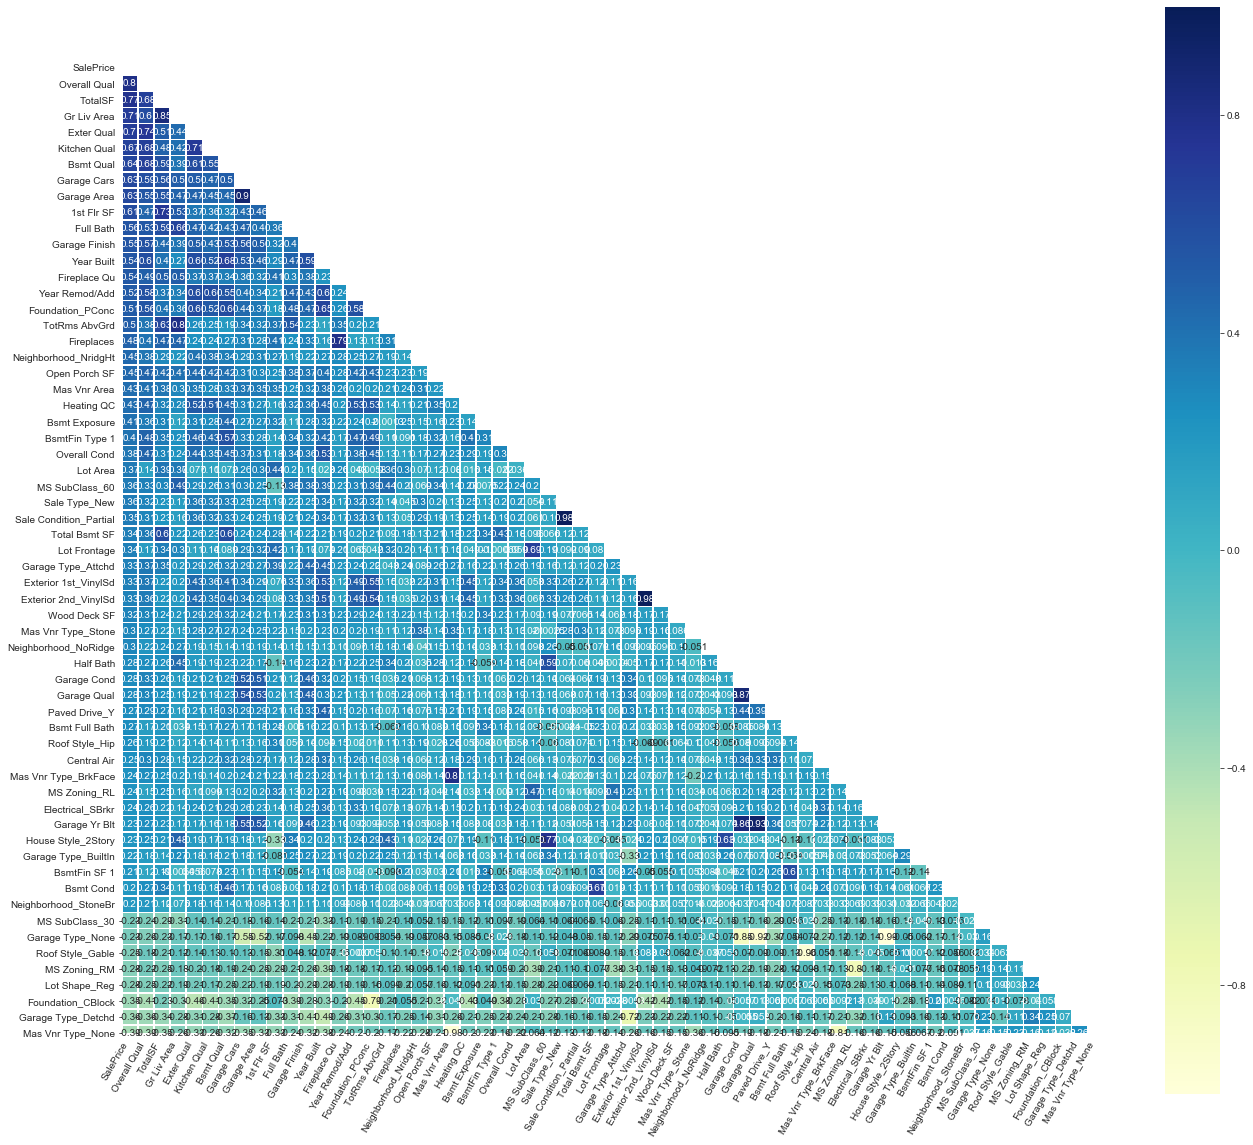

In [56]:
correlation = train.loc[:,corr_selected.index].corr()

mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    plt.figure(figsize = (22,20))
    ax = sns.heatmap(correlation, vmin=-1, vmax=1, mask=mask,cmap='YlGnBu',annot=True,linewidths=.5,square=True)
    label_y = ax.get_yticklabels()
    plt.setp(label_y, rotation=360, horizontalalignment='right')
    label_x = ax.get_xticklabels()
    plt.setp(label_x, rotation=60, horizontalalignment='right')

In [57]:
# Overall Qual, Exter Qual, Kitchen Qual, Bsmt Qual
# Garage Cars, Garage Area
# TotalSF, 1st Flr SF

In [58]:
train = df_concat.loc[df_concat['split'] == 1]
test = df_concat.loc[df_concat['split'] == 2]
test['Kitchen Qual'] = test['Kitchen Qual'].fillna(test['Kitchen Qual'].median())
test.isna().sum().sort_values(ascending = False)

SalePrice                 1210
Sale Condition_Partial       0
Lot Shape_IR3                0
Neighborhood_Blueste         0
Land Slope_Sev               0
                          ... 
Exterior 1st_MetalSd         0
Exterior 1st_ImStucc         0
Exterior 1st_HdBoard         0
Exterior 1st_CemntBd         0
Lot Frontage                 0
Length: 251, dtype: int64

target log1p

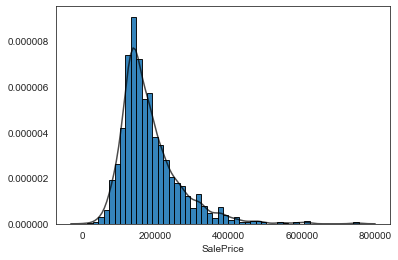

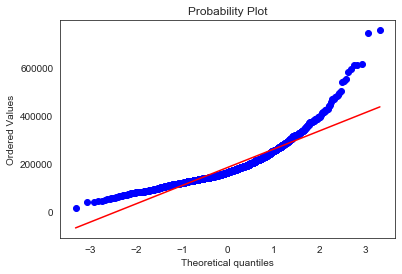

count      1569.000000
mean     183175.622690
std       81550.922219
min       13100.000000
25%      131000.000000
50%      162500.000000
75%      215000.000000
max      755000.000000
skew          1.881059
kurt          6.132858
Name: SalePrice, dtype: float64

In [59]:
# distribution -> positively skewed
sns.set_style(style='white')
sns.distplot(train['SalePrice'], 
             kde_kws={'color': 'black', 'alpha': 0.7}, 
             hist_kws={'alpha': 0.9, 'edgecolor':'black'})

# probability plot -> vary from the line at both ends
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()

# summary statiscitcs
train_describe = train['SalePrice'].describe()
train_describe.loc['skew'] = train['SalePrice'].skew()
train_describe.loc['kurt'] = train['SalePrice'].kurt()
train_describe

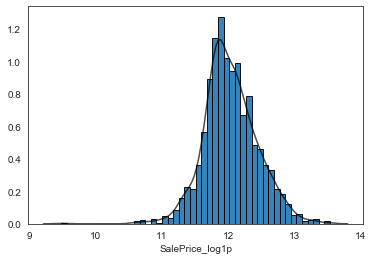

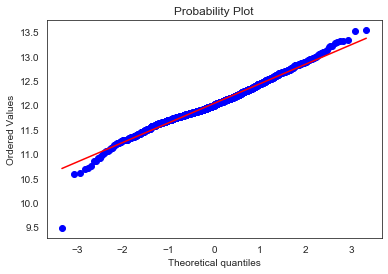

count    1569.000000
mean       12.034597
std         0.404290
min         9.480444
25%        11.782960
50%        11.998439
75%        12.278398
max        13.534474
skew        0.061846
kurt        1.498217
Name: SalePrice_log1p, dtype: float64

In [60]:
# log transfrom -> log1p prevent from negative prices
train['SalePrice_log1p'] = np.log1p(train['SalePrice'])

# plots & statistics after tranformation
sns.set_style(style='white')
sns.distplot(train['SalePrice_log1p'], 
             kde_kws={'color': 'black', 'alpha': 0.7}, 
             hist_kws={'alpha': 0.9, 'edgecolor':'black'})

fig = plt.figure()
res = stats.probplot(train['SalePrice_log1p'],plot=plt)
plt.show()

train_describe1 = train['SalePrice_log1p'].describe()
train_describe1.loc['skew'] = train['SalePrice_log1p'].skew()
train_describe1.loc['kurt'] = train['SalePrice_log1p'].kurt()
train_describe1

Prepare Features and Target

In [61]:
corr_selected_names = corr_selected.index
corr_selected_names

Index(['SalePrice', 'Overall Qual', 'TotalSF', 'Gr Liv Area', 'Exter Qual',
       'Kitchen Qual', 'Bsmt Qual', 'Garage Cars', 'Garage Area', '1st Flr SF',
       'Full Bath', 'Garage Finish', 'Year Built', 'Fireplace Qu',
       'Year Remod/Add', 'Foundation_PConc', 'TotRms AbvGrd', 'Fireplaces',
       'Neighborhood_NridgHt', 'Open Porch SF', 'Mas Vnr Area', 'Heating QC',
       'Bsmt Exposure', 'BsmtFin Type 1', 'Overall Cond', 'Lot Area',
       'MS SubClass_60', 'Sale Type_New', 'Sale Condition_Partial',
       'Total Bsmt SF', 'Lot Frontage', 'Garage Type_Attchd',
       'Exterior 1st_VinylSd', 'Exterior 2nd_VinylSd', 'Wood Deck SF',
       'Mas Vnr Type_Stone', 'Neighborhood_NoRidge', 'Half Bath',
       'Garage Cond', 'Garage Qual', 'Paved Drive_Y', 'Bsmt Full Bath',
       'Roof Style_Hip', 'Central Air', 'Mas Vnr Type_BrkFace', 'MS Zoning_RL',
       'Electrical_SBrkr', 'Garage Yr Blt', 'House Style_2Story',
       'Garage Type_BuiltIn', 'BsmtFin SF 1', 'Bsmt Cond',
       'N

In [62]:
features = []
for i in range(61):
    features.append(corr_selected_names[i])

In [63]:
features.remove('SalePrice')

In [64]:
features.remove('Garage Type_None')
features.remove('Garage Yr Blt')

In [65]:
X_train = train.loc[:,features]
t_train = train.loc[:,'SalePrice']
t_train_log1p = train.loc[:,'SalePrice_log1p']

X_test = test.loc[:,features]
t_test = test.loc[:,'SalePrice']

print(X_train.shape)
print(X_test.shape)
print(t_train.shape)
print(t_train_log1p.shape)
print(t_test.shape)

(1569, 58)
(1210, 58)
(1569,)
(1569,)
(1210,)


In [66]:
allfeatures = []
for i in range(61):
    allfeatures.append(corr_selected_names[i])
allfeatures.remove('SalePrice')
allX_train = train.loc[:,allfeatures]
allX_test = test.loc[:,allfeatures]
print(allX_train.shape)
print(allX_test.shape)

(1569, 60)
(1210, 60)


In [67]:
# MinMaxScaler, scale to (0,1) for NN
mmscaler = MinMaxScaler(feature_range=(0, 1))

data_train = mmscaler.fit_transform(train.values)
train_mmscaled = pd.DataFrame(data_train, columns = train.columns)
X_train_mmscaled = train_mmscaled.loc[:,features]
t_train_mmscaled = train_mmscaled.loc[:,'SalePrice_log1p']

data_X_test = mmscaler.fit_transform(X_test.values)
X_test_mmscaled = pd.DataFrame(data_X_test, columns = X_test.columns)

print(X_train_mmscaled.shape)
print(t_train_mmscaled.shape)
print(X_test_mmscaled.shape)

(1569, 58)
(1569,)
(1210, 58)


In [68]:
t_test_log1p = test.loc[:,'SalePrice']
t_test_log1p_nn = t_test_log1p.values.reshape(-1,1)
t_test_log1p_nn.shape

(1210, 1)

In [69]:
# StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
columns = X_train.columns
X_train_scaled = scaler.transform(X_train)
X_train_scaled_df = pd.DataFrame(scaler.transform(X_train),columns = columns)

scaler.fit(X_test)
columns = X_test.columns
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(scaler.transform(X_test),columns = columns)

In [70]:
scaler = StandardScaler()
scaler.fit(allX_train)
columns = allX_train.columns
allX_train_scaled = scaler.transform(allX_train)
allX_train_scaled_df = pd.DataFrame(scaler.transform(allX_train),columns = columns)

scaler.fit(allX_test)
columns = allX_test.columns
allX_test_scaled = scaler.transform(allX_test)
allX_test_scaled_df = pd.DataFrame(scaler.transform(allX_test),columns = columns)

In [71]:
def plot_regressions(X, y, lowess=False):

    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/3)) 

    fig, axes = plt.subplots(rows, 3, figsize=(12, rows*(12/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.regplot(X.iloc[:,i], y,  ci=None, y_jitter=0.05, 
                        scatter_kws={'s': 25, 'alpha':.8}, ax=ax, lowess=lowess)
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(labels[i])
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()
    
    return fig, axes

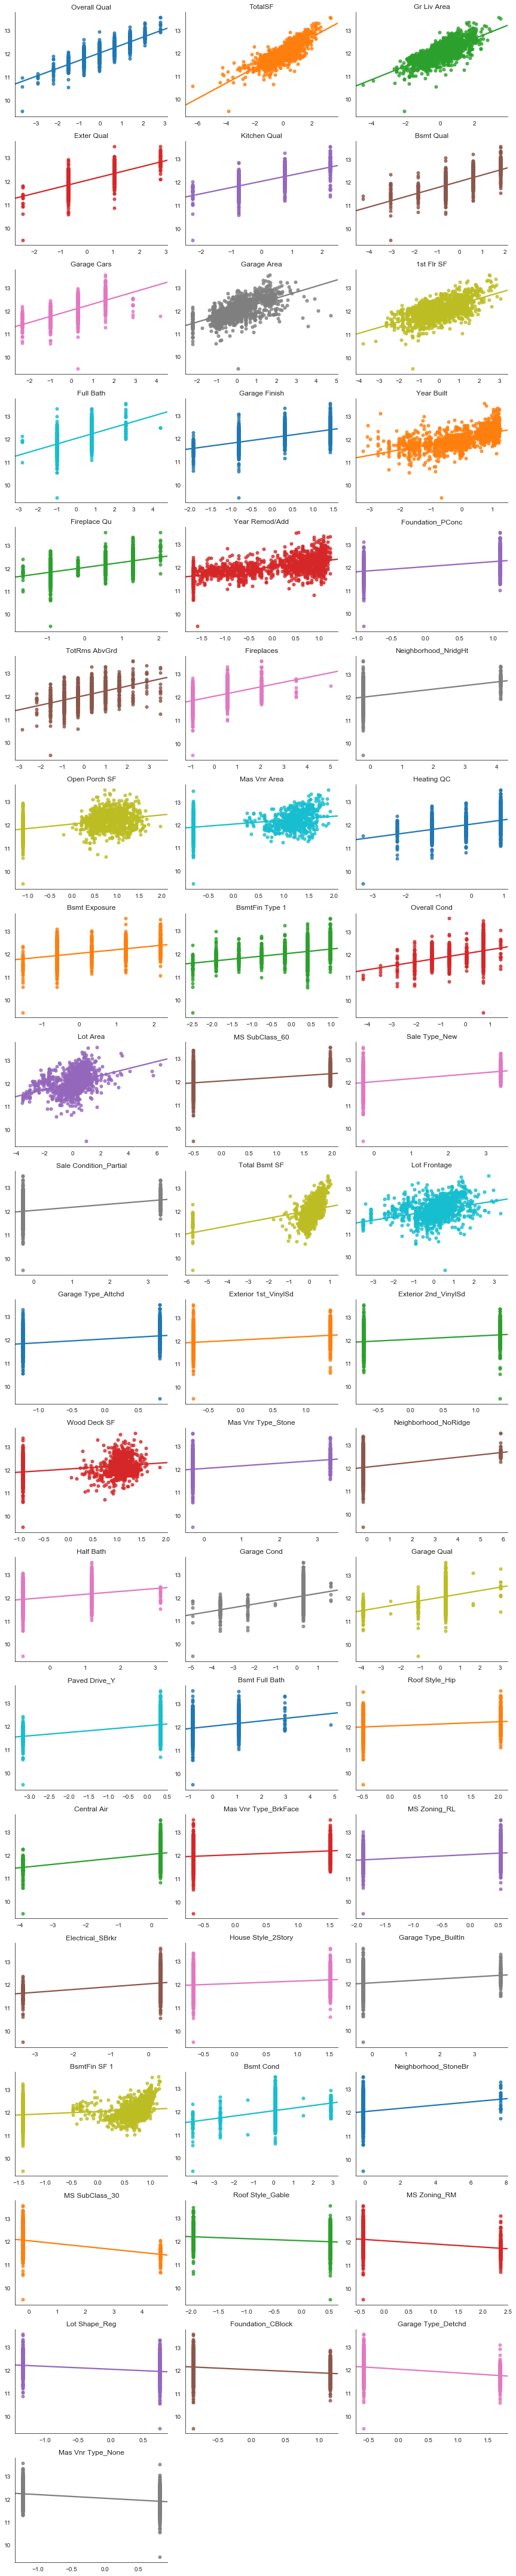

In [72]:
plot_regressions(X_train_scaled_df, t_train_log1p)
plt.show()

# Modelling

## OLS

In [73]:
def forwardselection(X, y):
    """Forward variable selection based on the Scikit learn API
    
    
    Output:
    ----------------------------------------------------------------------------------
    Scikit learn OLS regression object for the best model
    """

    # Functions
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score

    # Initialisation
    base = []
    p = X.shape[1]
    candidates = list(np.arange(p))

    # Forward recursion
    i=1
    bestcvscore=-np.inf    
    while i<=p:
        bestscore = 0
        for variable in candidates:
            ols = LinearRegression()
            ols.fit(X[:, base + [variable]], y)
            score = ols.score(X[:, base + [variable]], y)
            if score > bestscore:
                bestscore = score 
                best = ols
                newvariable=variable
        base.append(newvariable)
        candidates.remove(newvariable)
        
        cvscore = cross_val_score(best, X[:, base], y, scoring='neg_mean_squared_error').mean() 
        
        if cvscore > bestcvscore:
            bestcvscore=cvscore
            bestcv = best
            subset = base[:]
        i+=1
    
    #Finalise
    return bestcv, subset


class forward:
    def __init__(self):
        pass

    def fit(self, X, y):
        self.ols, self.subset = forwardselection(X, y)

    def predict(self, X):
        return self.ols.predict(X[:, self.subset])

    def cv_score(self, X, y, cv=5):
        from sklearn.model_selection import cross_val_score
        scores = cross_val_score(self.ols, X[:, self.subset], np.ravel(y), cv=cv, scoring='neg_mean_squared_error')
        return np.sqrt(-1*np.mean(scores))
    
    
class PCR:
    def __init__(self, M=1):
        self.M=M

    def fit(self, X, y):
        from sklearn.decomposition import PCA
        from sklearn.linear_model import LinearRegression
        
        self.pca=PCA(n_components=self.M)
        Z = self.pca.fit_transform(X)
        self.pcr = LinearRegression().fit(Z, y)

    def predict(self, X):
        return self.pcr.predict(self.pca.transform(X))

    def cv_score(self, X, y, cv=10):
        from sklearn.model_selection import cross_val_score
        Z=self.pca.transform(X)
        scores = cross_val_score(self.pcr, Z, np.ravel(y), cv=cv, scoring='neg_mean_squared_error').mean() 
        return np.sqrt(-1*np.mean(scores))

In [74]:
# Subset Selection
fwd = forward()
fwd.fit(X_train_scaled, t_train_log1p)

In [75]:
pred_fwd = fwd.predict(X_train_scaled)
fwd_rmse = math.sqrt(mean_squared_error(np.exp(t_train_log1p)-1, np.exp(pred_fwd)-1))
fwd_rmse

22727.805840510086

In [76]:
fwd_subset = X_train_scaled_df.iloc[:,fwd.subset].columns
fwd_subset

Index(['Overall Qual', 'TotalSF', 'Year Built', 'Lot Area', 'Kitchen Qual',
       'BsmtFin SF 1', 'Gr Liv Area', 'Garage Area', 'Year Remod/Add',
       'Fireplaces', 'Sale Type_New', 'Garage Cond', 'Exter Qual',
       'Bsmt Exposure', 'Paved Drive_Y', 'Neighborhood_NridgHt',
       'Neighborhood_NoRidge', 'Central Air', 'Bsmt Full Bath', 'Heating QC',
       'Neighborhood_StoneBr', 'Full Bath', 'MS SubClass_30', 'Roof Style_Hip',
       'Half Bath', '1st Flr SF', 'Bsmt Qual', 'MS Zoning_RL', 'Total Bsmt SF',
       'BsmtFin Type 1', 'Foundation_PConc', 'Foundation_CBlock'],
      dtype='object')

In [77]:
print('OLS Best subset selects {} features.'.format(len(fwd_subset)))

OLS Best subset selects 32 features.


In [78]:
OLS_train_X, OLS_valid_X, OLS_train_t, OLS_valid_t = train_test_split(X_train_scaled_df.iloc[:,fwd.subset], t_train_log1p, test_size=0.2, random_state=0)

In [79]:
OLS_model = LinearRegression(fit_intercept=True)
OLS_model.fit(OLS_train_X,OLS_train_t)
trainPredict_OLS=OLS_model.predict(OLS_train_X)
testPredict_OLS=OLS_model.predict(OLS_valid_X)
trainScore_OLS = math.sqrt(mean_squared_error(np.exp(OLS_train_t)-1, np.exp(trainPredict_OLS)-1))
print('OLS Train Score: %.4f RMSE' % (trainScore_OLS))
testScore_OLS = math.sqrt(mean_squared_error(np.exp(OLS_valid_t)-1, np.exp(testPredict_OLS)-1))
print('OLS Validation Score: %.4f RMSE' % (testScore_OLS))

OLS Train Score: 22823.4864 RMSE
OLS Validation Score: 22483.7337 RMSE


In [80]:
def plot_coefficients(model, labels):
    coef = model.coef_
    table = pd.Series(coef.ravel(), index = labels).sort_values(ascending=True, inplace=False)
    
    all_ = True
    if len(table) > 20:
        reference = pd.Series(np.abs(coef.ravel()), index = labels).sort_values(ascending=False, inplace=False)
        reference = reference.iloc[:20]
        table = table[reference.index]
        table = table.sort_values(ascending=True, inplace=False)
        all_ = False
        

    fig, ax = fig, ax = plt.subplots()
    table.T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    if all_:
        ax.set_title('Estimated coefficients', fontsize=14)
    else: 
        ax.set_title('Estimated coefficients (20 largest in absolute value)', fontsize=14)
    sns.despine()
    return fig, ax

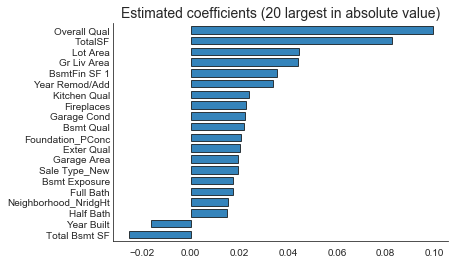

In [81]:
ols = LinearRegression(fit_intercept=True).fit(X_train_scaled_df.iloc[:,fwd.subset], t_train_log1p)
predictors=list(X_train_scaled_df.columns.values)
plot_coefficients(ols, fwd_subset) 
plt.show()

In [82]:
def r_squared(response, predicted):


    e2 = np.array((np.ravel(response)-np.ravel(predicted))**2)
    y2 = np.array((np.ravel(response)-np.mean(np.ravel(response)))**2)

    rss = np.sum(e2)
    tss = np.sum(y2)
    n = len(e2)

    resample = 1-(rss-e2)/(tss-y2)

    r2 = 1-rss/tss
    se = np.sqrt((n-1)*np.var(resample))

    return r2, se

In [83]:
pred_ols_train = ols.predict(X_train_scaled_df.iloc[:,fwd.subset])
ols_r2 = r_squared((np.exp(t_train_log1p)-1),(np.exp(pred_ols_train)-1))[0]
ols_r2

0.9222797563804224

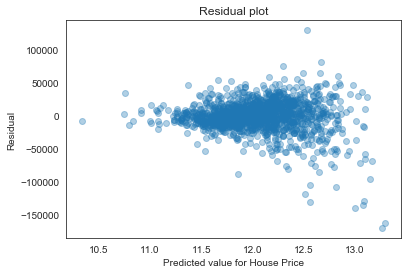

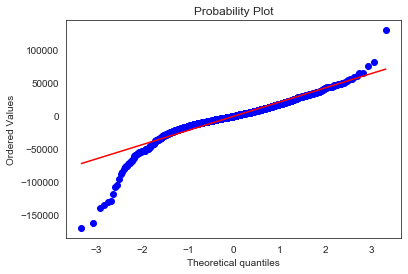

In [84]:
ols_residual = (np.exp(pred_ols_train)-1) - (np.exp(t_train_log1p)-1)
# Draw residual plots
plt.scatter(pred_ols_train,ols_residual,alpha = 0.35)
plt.xlabel('Predicted value for House Price')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.show()

fig = plt.figure()
stats.probplot(ols_residual, dist="norm", plot=plt)
plt.show()

## LASSO

In [85]:
alphas = list(np.logspace(-15, 15, 151, base=2))

Lasso_model =Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', LassoCV(alphas=alphas, cv=5)),
))

Lasso_model=Lasso_model.fit(X_train, t_train_log1p)

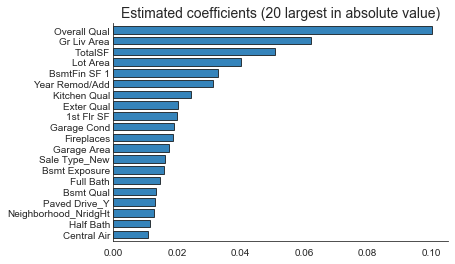

In [86]:
plot_coefficients(Lasso_model._final_estimator,X_train.columns)
plt.show()

In [87]:
reg = Lasso_model._final_estimator
reg

LassoCV(alphas=[3.0517578125e-05, 3.505549179068098e-05, 4.026818575356734e-05,
                4.625599873383782e-05, 5.313418965430448e-05, 6.103515625e-05,
                7.011098358136196e-05, 8.053637150713468e-05,
                9.251199746767564e-05, 0.00010626837930860896, 0.0001220703125,
                0.00014022196716272393, 0.00016107274301426937,
                0.0001850239949353513, 0.0002125367586172179, 0.000244140625,
                0.0...
                0.0005608878686508957, 0.0006442909720570775,
                0.000740095979741406, 0.0008501470344688716, 0.0009765625,
                0.0011217757373017914, 0.001288581944114155,
                0.001480191959482812, 0.0017002940689377433, ...],
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [88]:
lasso_shrink = np.sum(reg.coef_==0.0)
print('Lasso model shrinks {} coefficients to zero.'.format(lasso_shrink))

Lasso model shrinks 16 coefficients to zero.


In [89]:
LASSO_train_X, LASSO_valid_X, LASSO_train_t, LASSO_valid_t = train_test_split(X_train, t_train_log1p, test_size=0.2, random_state=0)

In [90]:
Lasso_model=Lasso_model.fit(LASSO_train_X, LASSO_train_t)
trainPredict_lasso=Lasso_model.predict(LASSO_train_X)
testPredict_lasso=Lasso_model.predict(LASSO_valid_X)
trainScore_lasso = math.sqrt(mean_squared_error(np.exp(LASSO_train_t)-1, np.exp(trainPredict_lasso)-1))
print('LASSO Train Score: %.4f RMSE' % (trainScore_lasso))
testScore_lasso = math.sqrt(mean_squared_error(np.exp(LASSO_valid_t)-1, np.exp(testPredict_lasso)-1))
print('LASSO Validation Score: %.4f RMSE' % (testScore_lasso))

LASSO Train Score: 23339.6252 RMSE
LASSO Validation Score: 22403.9383 RMSE


In [91]:
Lasso_model=Lasso_model.fit(X_train, t_train_log1p)

In [92]:
pred_lasso_train = Lasso_model.predict(X_train)
lasso_r2 = r_squared((np.exp(t_train_log1p)-1),(np.exp(pred_lasso_train)-1))[0]
lasso_r2

0.9201159845341169

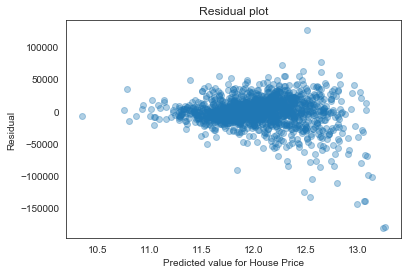

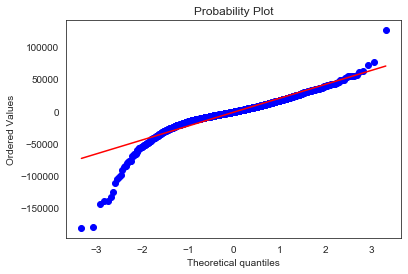

In [93]:
lasso_residual = (np.exp(pred_lasso_train)-1) - (np.exp(t_train_log1p)-1)
# Draw residual plots
plt.scatter(pred_lasso_train,lasso_residual,alpha = 0.35)
plt.xlabel('Predicted value for House Price')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.show()

fig = plt.figure()
stats.probplot(lasso_residual, dist="norm", plot=plt)
plt.show()

## Ridge

In [94]:
Ridge_model =Pipeline((
    ('scaler', StandardScaler()), #task 1 standardisation
    ('estimator', RidgeCV(alphas=alphas, cv=5)), #task 2, fit ridge regression
))

Ridge_model.fit(LASSO_train_X, LASSO_train_t)
trainPredict_Ridge=Ridge_model.predict(LASSO_train_X)
testPredict_Ridge=Ridge_model.predict(LASSO_valid_X)
trainScore_Ridge = math.sqrt(mean_squared_error(np.exp(LASSO_train_t)-1, np.exp(trainPredict_Ridge)-1))
print('Ridge Train Score: %.4f RMSE' % (trainScore_Ridge))
testScore_Ridge = math.sqrt(mean_squared_error(np.exp(LASSO_valid_t)-1, np.exp(testPredict_Ridge)-1))
print('Ridge Validation Score: %.4f RMSE' % (testScore_Ridge))

Ridge Train Score: 23187.3918 RMSE
Ridge Validation Score: 22612.5131 RMSE


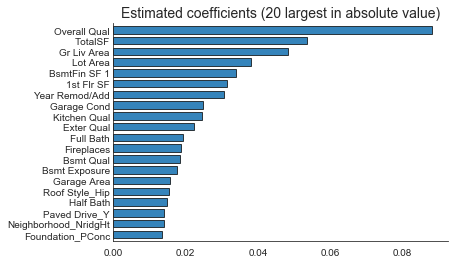

In [95]:
Ridge_model =Pipeline((
    ('scaler', StandardScaler()), #task 1 standardisation
    ('estimator', RidgeCV(alphas=alphas, cv=5)), #task 2, fit ridge regression
))

Ridge_model.fit(X_train, t_train_log1p)
plot_coefficients(Ridge_model._final_estimator,X_train.columns)
plt.show()

In [96]:
pred_ridge_train = Ridge_model.predict(X_train)
ridge_r2 = r_squared((np.exp(t_train_log1p)-1),(np.exp(pred_ridge_train)-1))[0]
ridge_r2

0.921407939577239

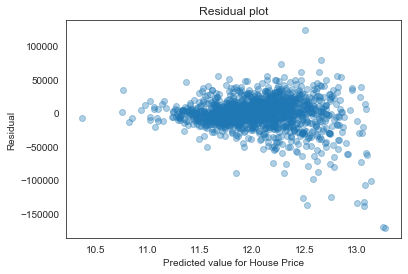

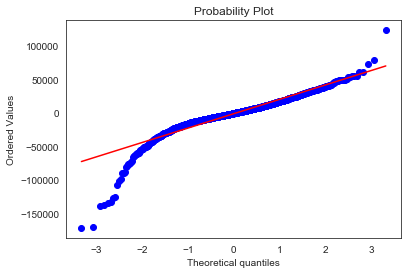

In [97]:
ridge_residual = (np.exp(pred_ridge_train)-1) - (np.exp(t_train_log1p)-1)
# Draw residual plots
plt.scatter(pred_ridge_train,ridge_residual,alpha = 0.35)
plt.xlabel('Predicted value for House Price')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.show()

fig = plt.figure()
stats.probplot(ridge_residual, dist="norm", plot=plt)
plt.show()

## Elastic Net

In [98]:
Enet_model = Pipeline((
    ('scaler', StandardScaler()), 
    ('estimator', ElasticNetCV(l1_ratio=[.01, .1, .2, .3, .4, .5, .6,.7,.8,.9])), 
))

Enet_model=Enet_model.fit(LASSO_train_X, LASSO_train_t)
trainPredict_Enet=Enet_model.predict(LASSO_train_X)
testPredict_Enet=Enet_model.predict(LASSO_valid_X)
trainScore_Enet = math.sqrt(mean_squared_error(np.exp(LASSO_train_t)-1, np.exp(trainPredict_Enet)-1))
print('Enet Train Score: %.4f RMSE' % (trainScore_Enet))
testScore_Enet = math.sqrt(mean_squared_error(np.exp(LASSO_valid_t)-1, np.exp(testPredict_Enet)-1))
print('Enet Validation Score: %.4f RMSE' % (testScore_Enet))

Enet Train Score: 23308.6548 RMSE
Enet Validation Score: 22416.1784 RMSE


In [99]:
pred_Enet_train = Ridge_model.predict(X_train)
Enet_r2 = r_squared((np.exp(t_train_log1p)-1),(np.exp(pred_Enet_train)-1))[0]
Enet_r2

0.921407939577239

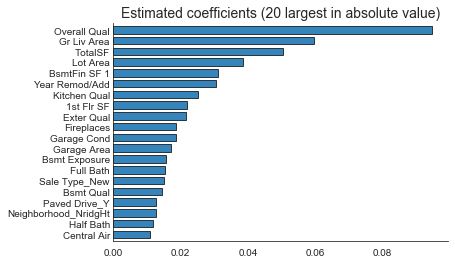

In [100]:
Enet_model = Pipeline((
    ('scaler', StandardScaler()), 
    ('estimator', ElasticNetCV(l1_ratio=[.01, .1, .2, .3, .4, .5, .6,.7,.8,.9])), 
))
Enet_model=Enet_model.fit(X_train, t_train_log1p)
plot_coefficients(Enet_model._final_estimator,X_train.columns)
plt.show()

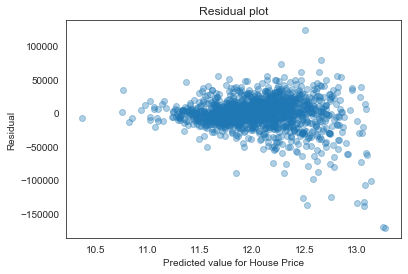

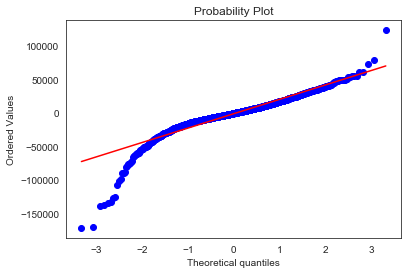

In [101]:
Enet_residual = (np.exp(pred_Enet_train)-1) - (np.exp(t_train_log1p)-1)
# Draw residual plots
plt.scatter(pred_Enet_train,Enet_residual,alpha = 0.35)
plt.xlabel('Predicted value for House Price')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.show()

fig = plt.figure()
stats.probplot(Enet_residual, dist="norm", plot=plt)
plt.show()

In [102]:
Enet_model=Enet_model.fit(X_train, t_train_log1p)

## KNN

In [103]:
knn = KNeighborsRegressor()  
    
tuning_parameters = {
    'n_neighbors': np.arange(1,51),
}

knn_search =  GridSearchCV(knn, tuning_parameters, cv=5,  scoring = 'neg_mean_squared_error', 
                           return_train_score=False, n_jobs=4)
knn_search.fit(X_train_scaled_df, t_train_log1p)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=4,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [104]:
knn_search.best_params_

{'n_neighbors': 8}

In [105]:
KNN_train_X, KNN_valid_X, KNN_train_t, KNN_valid_t = train_test_split(X_train_scaled_df, t_train_log1p, test_size=0.2, random_state=0)

In [106]:
knn = KNeighborsRegressor(n_neighbors=8) 
model_knn=knn.fit(KNN_train_X, KNN_train_t)
trainPredict_knn=model_knn.predict(KNN_train_X)
testPredict_knn=model_knn.predict(KNN_valid_X)
trainScore_knn = math.sqrt(mean_squared_error(np.exp(KNN_train_t)-1, np.exp(trainPredict_knn)-1))
print('KNN Train Score: %.4f RMSE' % (trainScore_knn))
testScore_knn = math.sqrt(mean_squared_error(np.exp(KNN_valid_t)-1, np.exp(testPredict_knn)-1))
print('KNN Validation Score: %.4f RMSE' % (testScore_knn))

KNN Train Score: 33535.1319 RMSE
KNN Validation Score: 32572.2152 RMSE


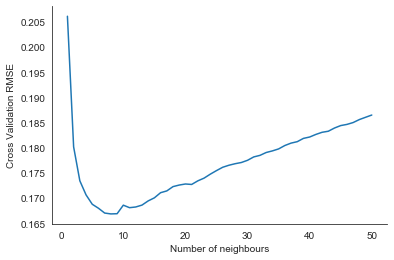

Lowest CV error: K = 8


In [107]:
neighbours=np.arange(1, 51)

cv_rmse = []
for k in neighbours: 
    model = KNeighborsRegressor(n_neighbors= k) 
    scores = cross_val_score(model, X_train_scaled_df, t_train_log1p, cv=5, scoring = 'neg_mean_squared_error')
    rmse = np.sqrt(-1*np.mean(scores))
    cv_rmse.append(rmse)

fig, ax= plt.subplots()
ax.plot(neighbours, cv_rmse)
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('Cross Validation RMSE')
sns.despine()
plt.show()
  
print(f'Lowest CV error: K = {1 + np.argmin(cv_rmse)}')   

In [108]:
knn.fit(X_train_scaled_df, t_train_log1p)
pred_knn_train = knn.predict(X_train_scaled)
knn_r2 = r_squared((np.exp(t_train_log1p)-1),(np.exp(pred_knn_train)-1))[0]
knn_r2  # -> rubbish

0.8434663845880501

In [109]:
knn = KNeighborsRegressor(n_neighbors=8) 
model_knn=knn.fit(X_train_scaled_df, t_train_log1p)

## Bagging

In [110]:
bag = BaggingRegressor() 
param_grid = {'n_estimators': np.arange(1,200,10)} 
bag_search =  GridSearchCV(bag, param_grid, cv=5,  scoring = 'neg_mean_squared_error', return_train_score=False, n_jobs=4)
bag_search.fit(X_train_scaled_df, t_train_log1p)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=4,
             param_grid={'n_estimators': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [111]:
bag_search.best_params_

{'n_estimators': 181}

In [112]:
bag = BaggingRegressor(n_estimators=191, random_state=0)
bag.fit(KNN_train_X, KNN_train_t)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=191,
                 n_jobs=None, oob_score=False, random_state=0, verbose=0,
                 warm_start=False)

In [113]:
trainPredict_bag=bag.predict(KNN_train_X)
testPredict_bag=bag.predict(KNN_valid_X)
trainScore_bag = math.sqrt(mean_squared_error(np.exp(KNN_train_t)-1, np.exp(trainPredict_bag)-1))
print('Bagging Train Score: %.4f RMSE' % (trainScore_bag))
testScore_bag = math.sqrt(mean_squared_error(np.exp(KNN_valid_t)-1, np.exp(testPredict_bag)-1))
print('Bagging Validation Score: %.4f RMSE' % (testScore_bag)) 

Bagging Train Score: 10574.1831 RMSE
Bagging Validation Score: 24975.4797 RMSE


In [114]:
pred_bag_train = bag.predict(X_train_scaled_df)
bag_r2 = r_squared((np.exp(t_train_log1p)-1),(np.exp(pred_bag_train)-1))[0]
bag_r2

0.9677609499790728

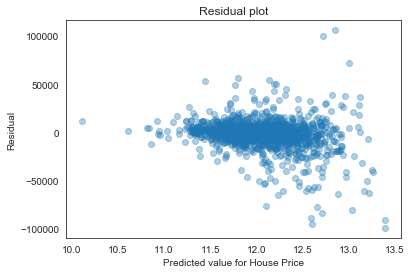

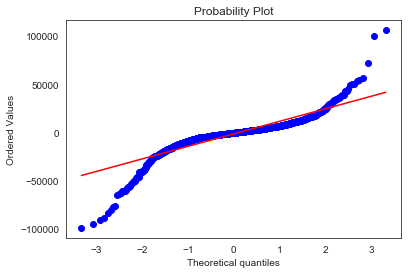

In [115]:
bag_residual = (np.exp(pred_bag_train)-1) - (np.exp(t_train_log1p)-1)
# Draw residual plots
plt.scatter(pred_bag_train,bag_residual,alpha = 0.35)
plt.xlabel('Predicted value for House Price')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.show()

fig = plt.figure()
stats.probplot(bag_residual, dist="norm", plot=plt)
plt.show()

In [116]:
bag = BaggingRegressor(n_estimators=191, random_state=0)
bag.fit(X_train_scaled_df, t_train_log1p)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=191,
                 n_jobs=None, oob_score=False, random_state=0, verbose=0,
                 warm_start=False)

## Regression Tree

In [117]:
tree = DecisionTreeRegressor()

tuning_parameters = {
    'min_samples_leaf': [1,5,10,20],
    'max_depth': np.arange(1,30),
}

tree = GridSearchCV(tree, tuning_parameters, cv=5, return_train_score=False)
tree.fit(X_train_scaled_df,t_train_log1p)

print('Best parameters:', tree.best_params_)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 20}


In [118]:
tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=20)
tree.fit(KNN_train_X, KNN_train_t)
trainPredict_tree=tree.predict(KNN_train_X)
testPredict_tree=tree.predict(KNN_valid_X)
trainScore_tree = math.sqrt(mean_squared_error(np.exp(KNN_train_t)-1, np.exp(trainPredict_tree)-1))
print('Tree Train Score: %.4f RMSE' % (trainScore_tree))
testScore_tree = math.sqrt(mean_squared_error(np.exp(KNN_valid_t)-1, np.exp(testPredict_tree)-1))
print('Tree Validation Score: %.4f RMSE' % (testScore_tree)) 

Tree Train Score: 27524.4455 RMSE
Tree Validation Score: 31760.4959 RMSE


In [119]:
pred_tree_train = tree.predict(X_train_scaled_df)
tree_r2 = r_squared((np.exp(t_train_log1p)-1),(np.exp(pred_tree_train)-1))[0]
tree_r2

0.8784508390483564

In [120]:
tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=20)
tree.fit(X_train_scaled_df, t_train_log1p)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

## Random Forest

In [121]:
rf = RandomForestRegressor()

tuning_parameters = {
    'min_samples_leaf': [1,5, 10, 20, 50],
    'max_features': np.arange(1, X_train_scaled.shape[1], 5),
}

rf_search = GridSearchCV(rf, tuning_parameters, cv = 5, return_train_score=False, n_jobs=4)
rf_search.fit(X_train_scaled_df, t_train_log1p)

rf = rf_search.best_estimator_

print('Best parameters:', rf_search.best_params_, '\n')

Best parameters: {'max_features': 41, 'min_samples_leaf': 5} 



In [122]:
def plot_feature_importance(model, labels, max_features = 20):
    feature_importance = model.feature_importances_*100
    feature_importance = 100*(feature_importance/np.max(feature_importance))
    table = pd.Series(feature_importance, index = labels).sort_values(ascending=True, inplace=False)
    fig, ax = fig, ax = plt.subplots(figsize=(9,6))
    if len(table) > max_features:
        table.iloc[-max_features:].T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    else:
        table.T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    ax.set_title('Variable importance', fontsize=13)
    sns.despine()
    return fig, ax

In [123]:
rf = RandomForestRegressor(max_features=16,min_samples_leaf=1)
rf.fit(KNN_train_X,KNN_train_t)
trainPredict_rf=rf.predict(KNN_train_X)
testPredict_rf=rf.predict(KNN_valid_X)
trainScore_rf = math.sqrt(mean_squared_error(np.exp(KNN_train_t)-1, np.exp(trainPredict_rf)-1))
print('RF Train Score: %.4f RMSE' % (trainScore_rf))
testScore_rf = math.sqrt(mean_squared_error(np.exp(KNN_valid_t)-1, np.exp(testPredict_rf)-1))
print('RF Validation Score: %.4f RMSE' % (testScore_rf)) 

RF Train Score: 12593.3516 RMSE
RF Validation Score: 26918.4877 RMSE


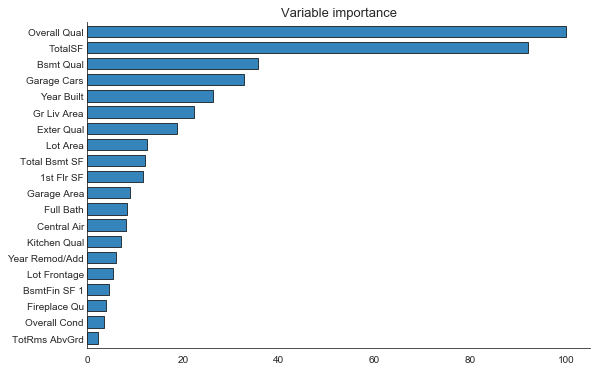

In [124]:
plot_feature_importance(rf, predictors)
plt.show()

In [125]:
pred_rf_train = rf.predict(X_train_scaled_df)
rf_r2 = r_squared((np.exp(t_train_log1p)-1),(np.exp(pred_rf_train)-1))[0]
rf_r2

0.9590950501471827

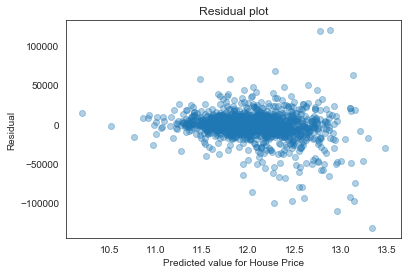

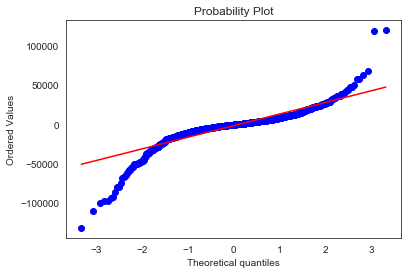

In [126]:
rf_residual = (np.exp(pred_rf_train)-1) - (np.exp(t_train_log1p)-1)
# Draw residual plots
plt.scatter(pred_rf_train,rf_residual,alpha = 0.35)
plt.xlabel('Predicted value for House Price')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.show()

fig = plt.figure()
stats.probplot(rf_residual, dist="norm", plot=plt)
plt.show()

In [127]:
rf = RandomForestRegressor(max_features=16,min_samples_leaf=1)
rf.fit(X_train_scaled_df, t_train_log1p)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=16, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Gradient Boosting

In [128]:
gb = GradientBoostingRegressor() 

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2 ,3, 4],
    'subsample' : [0.6, 0.8, 1.0]
}

gb = GridSearchCV(gb, tuning_parameters, cv = 5, return_train_score=False, n_jobs=-1)
gb.fit(X_train_scaled_df, t_train_log1p)

print('Best parameters:', gb.best_params_, '\n')

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1500, 'subsample': 0.6} 



In [129]:
gb.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

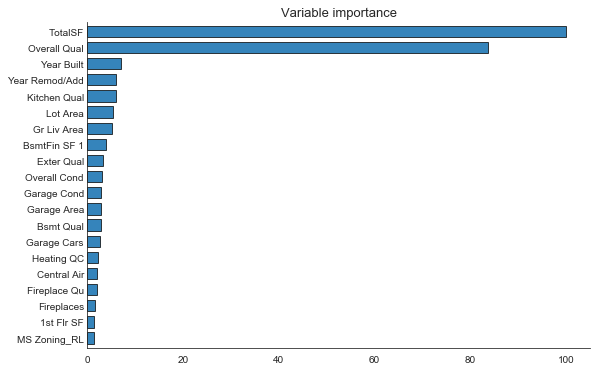

In [130]:
plot_feature_importance(gb.best_estimator_, predictors)
plt.show()

In [131]:
gb = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 4, n_estimators=1500, subsample=0.6)
gb.fit(KNN_train_X, KNN_train_t)
trainPredict_gb=gb.predict(KNN_train_X)
testPredict_gb=gb.predict(KNN_valid_X)
trainScore_gb = math.sqrt(mean_squared_error(np.exp(KNN_train_t)-1, np.exp(trainPredict_gb)-1))
print('GB Train Score: %.4f RMSE' % (trainScore_gb))
testScore_gb = math.sqrt(mean_squared_error(np.exp(KNN_valid_t)-1, np.exp(testPredict_gb)-1))
print('GB Validation Score: %.4f RMSE' % (testScore_gb)) 

GB Train Score: 9174.7978 RMSE
GB Validation Score: 21783.7522 RMSE


In [132]:
pred_gb_train = gb.predict(X_train_scaled_df)
gb_r2 = r_squared((np.exp(t_train_log1p)-1),(np.exp(pred_gb_train)-1))[0]
gb_r2

0.975580801903242

In [133]:
gb = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 4, n_estimators=1500, subsample=0.6)
gb.fit(X_train_scaled_df, t_train_log1p)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## XGB

In [134]:
xgb_model = xgb.XGBRegressor()

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2, 3, 4],
    'subsample' : [0.4, 0.6, 0.8],
}

gb_search = GridSearchCV(xgb_model, tuning_parameters, cv = 5, return_train_score=False, n_jobs=-1)
gb_search.fit(X_train_scaled_df, t_train_log1p)

xbst = gb_search.best_estimator_


print('Best parameters:', gb_search.best_params_, '\n')

[01:07:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1500, 'subsample': 0.4} 



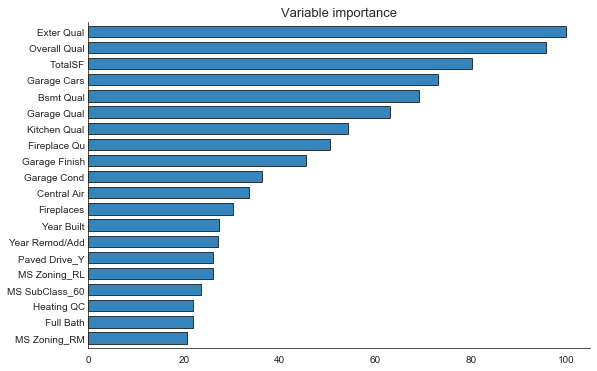

In [135]:
plot_feature_importance(xbst,labels=predictors)
plt.show()

In [136]:
model_xgb = xgb.XGBRegressor(learning_rate = 0.01, max_depth = 3, n_estimators=1500, subsample=0.6)
model_xgb.fit(KNN_train_X, KNN_train_t)
trainPredict_xgb=model_xgb.predict(KNN_train_X)
testPredict_xgb=model_xgb.predict(KNN_valid_X)
trainScore_xgb = math.sqrt(mean_squared_error(np.exp(KNN_train_t)-1, np.exp(trainPredict_xgb)-1))
print('XGB Train Score: %.4f RMSE' % (trainScore_xgb))
testScore_xgb = math.sqrt(mean_squared_error(np.exp(KNN_valid_t)-1, np.exp(testPredict_xgb)-1))
print('XGB Validation Score: %.4f RMSE' % (testScore_xgb)) 

[01:07:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB Train Score: 14332.3283 RMSE
XGB Validation Score: 21394.5761 RMSE


In [137]:
pred_xgb_train = model_xgb.predict(X_train_scaled_df)
xgb_r2 = r_squared((np.exp(t_train_log1p)-1),(np.exp(pred_xgb_train)-1))[0]
xgb_r2

0.9614959147646833

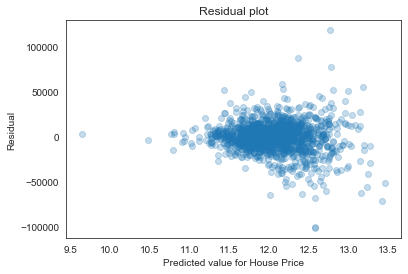

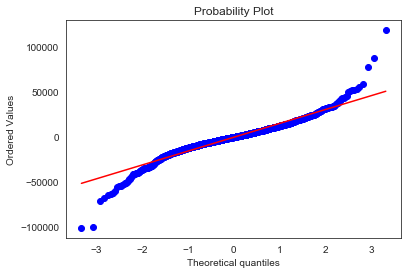

In [138]:
xgb_residual = (np.exp(pred_xgb_train)-1) - (np.exp(t_train_log1p)-1)
# Draw residual plots
plt.scatter(pred_xgb_train,xgb_residual,alpha = 0.25)
plt.xlabel('Predicted value for House Price')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.show()

fig = plt.figure()
stats.probplot(xgb_residual, dist="norm", plot=plt)
plt.show()

In [139]:
model_xgb = xgb.XGBRegressor(learning_rate = 0.01, max_depth = 3, n_estimators=1500, subsample=0.6)
model_xgb.fit(X_train_scaled_df, t_train_log1p)

[01:07:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.6, verbosity=1)

## Neural Network

In [140]:
print(X_train_mmscaled.shape)
print(t_train_mmscaled.shape)
print(X_test_mmscaled.shape)
t_train_mmscaled = t_train_mmscaled.values.reshape(-1,1)

(1569, 58)
(1569,)
(1210, 58)


In [141]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [142]:
nn_X_train,nn_X_test,nn_y_train,nn_y_test = train_test_split(X_train_mmscaled,t_train_mmscaled,test_size=0.2,random_state=0)

In [143]:
nn_y_train = nn_y_train.reshape(-1,1)
nn_y_train.shape

(1255, 1)

In [144]:
t_train_log1p_nn = t_train_log1p.values.reshape(-1,1)
t_train_log1p_nn.shape

(1569, 1)

In [145]:
def add_layer(inputs,input_size,output_size,activation_function=None):
    with tf.variable_scope("Weights"):
        Weights = tf.Variable(tf.random_normal(shape=[input_size,output_size]),name="weights")
    with tf.variable_scope("biases"):
        biases = tf.Variable(tf.zeros(shape=[1,output_size]) + 0.1,name="biases")
    with tf.name_scope("Wx_plus_b"):
        Wx_plus_b = tf.matmul(inputs,Weights) + biases
    with tf.name_scope("dropout"):
        Wx_plus_b = tf.nn.dropout(Wx_plus_b,keep_prob=keep_prob_s)
    if activation_function is None:
        return Wx_plus_b
    else:
        with tf.name_scope("activation_function"):
            return activation_function(Wx_plus_b)

In [146]:
xs = tf.placeholder(shape=[None,X_train_mmscaled.shape[1]],dtype=tf.float32,name="inputs")
ys = tf.placeholder(shape=[None,1],dtype=tf.float32,name="y_true") 
keep_prob_s = tf.placeholder(dtype=tf.float32,name='keep_prob')

with tf.name_scope("layer_1"):
    l1 = add_layer(xs,58,10,activation_function=tf.nn.relu)

with tf.name_scope("y_pred"):
    pred = add_layer(l1,10,1)

# 保存pred
pred = tf.add(pred,0,name='pred')

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - pred),reduction_indices=[1]))  # mse
    tf.summary.scalar("loss",tensor=loss)
with tf.name_scope("train"):
    # train_op =tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
    train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


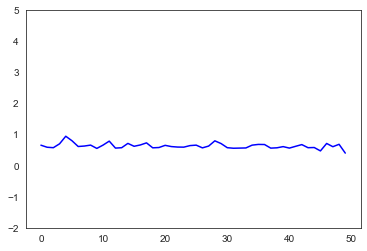

In [147]:
# draw pics
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(50),nn_y_train[0:50],'b')  #展示前50个数据
ax.set_ylim([-2,5])
plt.ion()
plt.show()

# parameters
keep_prob=1 
ITER =5000  # 训练次数

In [148]:
def fit(X, y, ax, n, keep_prob):
    init = tf.global_variables_initializer()
    feed_dict_train = {ys: y, xs: X, keep_prob_s: keep_prob}
    with tf.Session() as sess:
        saver = tf.train.Saver(tf.global_variables(), max_to_keep=15)
        merged = tf.summary.merge_all()
        writer = tf.summary.FileWriter(logdir="nn_house_log", graph=sess.graph)  #写tensorbord
        sess.run(init)
        for i in range(n):
            _loss, _ = sess.run([loss, train_op], feed_dict=feed_dict_train)

            if i % 100 == 0:
                print("epoch:%d\tloss:%.5f" % (i, _loss))
                y_pred = sess.run(pred, feed_dict=feed_dict_train)
                rs = sess.run(merged, feed_dict=feed_dict_train)
                writer.add_summary(summary=rs, global_step=i)  #写tensorbord
                saver.save(sess=sess, save_path="nn_house_model/nn_house.model", global_step=i) # 保存模型
                try:
                    ax.lines.remove(lines[0])
                except:
                    pass
                lines = ax.plot(range(50), y_pred[0:50], 'r--')
                plt.pause(1)

        saver.save(sess=sess, save_path="nn_house_model/nn_house.model", global_step=n)  # 保存模型

In [149]:
fit(X=X_train_mmscaled,y=t_train_log1p_nn,n=ITER,keep_prob=keep_prob,ax=ax)

epoch:0	loss:322.01694
epoch:100	loss:12.08961
epoch:200	loss:7.02616
epoch:300	loss:4.75201
epoch:400	loss:3.29654
epoch:500	loss:2.33490
epoch:600	loss:1.67189
epoch:700	loss:1.18934
epoch:800	loss:0.86239
epoch:900	loss:0.67721
epoch:1000	loss:0.55119
epoch:1100	loss:0.45941
epoch:1200	loss:0.38576
epoch:1300	loss:0.32888
epoch:1400	loss:0.28168
epoch:1500	loss:0.23822
Instructions for updating:
Use standard file APIs to delete files with this prefix.
epoch:1600	loss:0.20169
epoch:1700	loss:0.17163
epoch:1800	loss:0.14695
epoch:1900	loss:0.12030
epoch:2000	loss:0.10151
epoch:2100	loss:0.08765
epoch:2200	loss:0.07361
epoch:2300	loss:0.06260
epoch:2400	loss:0.05471
epoch:2500	loss:0.04931
epoch:2600	loss:0.04515
epoch:2700	loss:0.04160
epoch:2800	loss:0.03836
epoch:2900	loss:0.03520
epoch:3000	loss:0.03234
epoch:3100	loss:0.02904
epoch:3200	loss:0.02631
epoch:3300	loss:0.02413
epoch:3400	loss:0.02235
epoch:3500	loss:0.02085
epoch:3600	loss:0.01965
epoch:3700	loss:0.01872
epoch:3800	lo

In [150]:
def predict(X,y,keep_prob):

    with tf.Session() as sess:

        # restore saver
        saver = tf.train.import_meta_graph(meta_graph_or_file="nn_house_model/nn_house.model-5000.meta")
        model_file = tf.train.latest_checkpoint(checkpoint_dir="nn_house_model")
        saver.restore(sess=sess,save_path=model_file)

        # init graph
        graph = tf.get_default_graph()

        # get placeholder from graph
        xs = graph.get_tensor_by_name("inputs:0")
        ys = graph.get_tensor_by_name("y_true:0")
        keep_prob_s = graph.get_tensor_by_name("keep_prob:0")

        # get operation from graph
        pred = graph.get_tensor_by_name("pred:0")

        # run pred
        feed_dict = {xs: X, ys: y, keep_prob_s: keep_prob}
        y_pred = sess.run(pred,feed_dict=feed_dict)

    return y_pred.reshape(-1)


In [151]:
y_pred = predict(X=X_test_mmscaled,y=t_test_log1p_nn,keep_prob=1)

INFO:tensorflow:Restoring parameters from nn_house_model\nn_house.model-5000


## Stacking

In [152]:
models = [ols,Lasso_model,Ridge_model,Enet_model,gb,model_xgb]
stack = StackingCVRegressor(models, meta_regressor = LinearRegression(), cv=10)
stack.fit(X_train_scaled_df.values, t_train_log1p.ravel())

[01:10:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:31] WARNI

StackingCVRegressor(cv=10,
                    meta_regressor=LinearRegression(copy_X=True,
                                                    fit_intercept=True,
                                                    n_jobs=None,
                                                    normalize=False),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
                    refit=True,
                    regressors=[LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                                Pipeline(memory=None,
                                         steps=[('scaler',
                                                 StandardScaler(copy=True,
                                                                with_mean=True,...
                                             importance_type='gain',
                                         

In [153]:
pred_stack_train = stack.predict(X_train_scaled_df.values)
stack_rmse = math.sqrt(mean_squared_error(np.exp(t_train_log1p)-1, np.exp(pred_stack_train)-1))
stack_rmse

16340.959779409319

In [154]:
stack_r2 = r_squared((np.exp(t_train_log1p)-1),(np.exp(pred_stack_train)-1))[0]
stack_r2

0.9598233007466843

In [156]:
models_2 = [Lasso_model,Enet_model,gb,model_xgb]
stack2 = StackingCVRegressor(models_2, meta_regressor = LinearRegression(), cv=10)
stack2.fit(X_train_scaled_df.values, t_train_log1p.ravel())
pred_stack_train_2 = stack2.predict(X_train_scaled_df.values)
stack_rmse_2 = math.sqrt(mean_squared_error(np.exp(t_train_log1p)-1, np.exp(pred_stack_train_2)-1))
print(stack_rmse_2)
stack_r2_2 = r_squared((np.exp(t_train_log1p)-1),(np.exp(pred_stack_train_2)-1))[0]
print(stack_r2_2)

[01:14:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:06] WARNI

In [157]:
stack2.fit(KNN_train_X, KNN_train_t)
trainPredict_stack2=model_xgb.predict(KNN_train_X)
testPredict_stack2=model_xgb.predict(KNN_valid_X)
trainScore_stack2 = math.sqrt(mean_squared_error(np.exp(KNN_train_t)-1, np.exp(trainPredict_stack2)-1))
print('stack2 Train Score: %.4f RMSE' % (trainScore_stack2))
testScore_stack2 = math.sqrt(mean_squared_error(np.exp(KNN_valid_t)-1, np.exp(testPredict_stack2)-1))
print('stack2 Validation Score: %.4f RMSE' % (testScore_stack2)) 

[01:17:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:40] WARNI

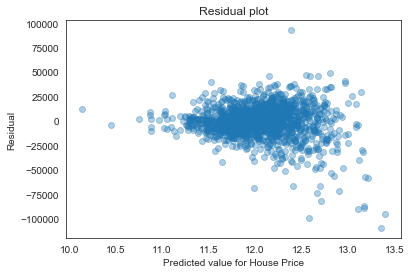

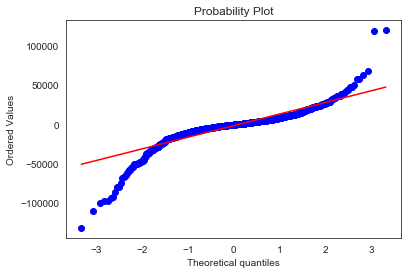

In [158]:
stack_residual = (np.exp(pred_stack_train)-1) - (np.exp(t_train_log1p)-1)
# Draw residual plots
plt.scatter(pred_stack_train,stack_residual,alpha = 0.35)
plt.xlabel('Predicted value for House Price')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.show()

fig = plt.figure()
stats.probplot(rf_residual, dist="norm", plot=plt)
plt.show()

In [159]:
models_2 = [Lasso_model,Enet_model,gb,model_xgb]
stack3 = StackingCVRegressor(models_2, meta_regressor = model_xgb, cv=10)
stack3.fit(X_train_scaled_df.values, t_train_log1p.ravel())
pred_stack_train_3 = stack3.predict(X_train_scaled_df.values)
stack_rmse_3 = math.sqrt(mean_squared_error(np.exp(t_train_log1p)-1, np.exp(pred_stack_train_3)-1))
print(stack_rmse_3)
stack_r2_3 = r_squared((np.exp(t_train_log1p)-1),(np.exp(pred_stack_train_3)-1))[0]
print(stack_r2_3)

[01:19:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:20:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:20:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:20:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:20:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:20:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:20:39] WARNI

In [160]:
models_2 = [Lasso_model,Enet_model,gb,model_xgb]
stack4 = StackingCVRegressor(models_2, meta_regressor = Ridge_model, cv=10)
stack4.fit(X_train_scaled_df.values, t_train_log1p.ravel())
pred_stack_train_4 = stack4.predict(X_train_scaled_df.values)
stack_rmse_4 = math.sqrt(mean_squared_error(np.exp(t_train_log1p)-1, np.exp(pred_stack_train_4)-1))
print(stack_rmse_4)
stack_r2_4 = r_squared((np.exp(t_train_log1p)-1),(np.exp(pred_stack_train_4)-1))[0]
print(stack_r2_4)

[01:23:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:23:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:23:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:23:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:23:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:23:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:23:49] WARNI

In [161]:
columns=['Train RMSE','Validation RMSE','R Squared']
rows=['Forward', 'Lasso', 'Ridge', 'Elastic Net','KNN','Bagging', 'Regression Tree','Random Forest', 'Gradient Boosting', 'XGBoost','Stack']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

results.loc['Forward'][0] = trainScore_OLS
results.loc['Lasso'][0] = trainScore_lasso
results.loc['Ridge'][0] = trainScore_Ridge
results.loc['Elastic Net'] [0]= trainScore_Enet
results.loc['KNN'] [0]= trainScore_knn
results.loc['Bagging'][0]=trainScore_bag
results.loc['Regression Tree'][0] = trainScore_tree
results.loc['Random Forest'] [0]= trainScore_rf
results.loc['Gradient Boosting'][0] = trainScore_gb
results.loc['XGBoost'] [0] =trainScore_xgb
results.loc['Stack'][0]=trainScore_stack2

results.loc['Forward'][1] = testScore_OLS
results.loc['Lasso'][1] = testScore_lasso
results.loc['Ridge'][1] = testScore_Ridge
results.loc['Elastic Net'] [1]= testScore_Enet
results.loc['KNN'] [1]= testScore_knn
results.loc['Bagging'][1]=testScore_bag
results.loc['Regression Tree'][1] = testScore_tree
results.loc['Random Forest'] [1]= testScore_rf
results.loc['Gradient Boosting'][1] = testScore_gb
results.loc['XGBoost'] [1] = testScore_xgb
results.loc['Stack'][1]=testScore_stack2

results.loc['Forward'][2] = ols_r2
results.loc['Lasso'][2] = lasso_r2
results.loc['Ridge'][2] = ridge_r2
results.loc['Elastic Net'] [2]= Enet_r2
results.loc['KNN'] [2]= knn_r2
results.loc['Bagging'][2]=bag_r2
results.loc['Regression Tree'][2] = tree_r2
results.loc['Random Forest'] [2]= rf_r2
results.loc['Gradient Boosting'][2] = gb_r2
results.loc['XGBoost'] [2] = xgb_r2
results.loc['Stack'][2]=stack_r2_2

results

Train RMSE  Validation RMSE  R Squared
Forward            22823.486364     22483.733692   0.922280
Lasso              23339.625208     22403.938342   0.920116
Ridge              23187.391800     22612.513059   0.921408
Elastic Net        23308.654827     22416.178360   0.921408
KNN                33535.131902     32572.215241   0.843466
Bagging            10574.183124     24975.479695   0.967761
Regression Tree    27524.445548     31760.495866   0.878451
Random Forest      12593.351571     26918.487729   0.959095
Gradient Boosting   9174.797826     21783.752243   0.975581
XGBoost            14332.328339     21394.576130   0.961496
Stack              15163.073791     14541.983368   0.960954

In [162]:
results['Validation RMSE'].sort_values()

Stack                14541.983368
XGBoost              21394.576130
Gradient Boosting    21783.752243
Lasso                22403.938342
Elastic Net          22416.178360
Forward              22483.733692
Ridge                22612.513059
Bagging              24975.479695
Random Forest        26918.487729
Regression Tree      31760.495866
KNN                  32572.215241
Name: Validation RMSE, dtype: float64

# Submission

In [163]:
stack_pred=np.exp(stack.predict(X_test_scaled))-1
submission = pd.DataFrame(np.c_[test.index, stack_pred], columns=['Test_ID', 'SalePrice'])
submission['Test_ID'] = submission['Test_ID'].astype(int)
submission.to_csv('stack.csv',  index=False) # 20918.41080

In [164]:
stack_pred2=np.exp(stack2.predict(X_test_scaled))-1
submission = pd.DataFrame(np.c_[test.index, stack_pred2], columns=['Test_ID', 'SalePrice'])
submission['Test_ID'] = submission['Test_ID'].astype(int)
submission.to_csv('stack2_2.csv',  index=False) # 20241.04594 -> nice

In [165]:
stack_pred3=np.exp(stack3.predict(X_test_scaled))-1
submission = pd.DataFrame(np.c_[test.index, stack_pred3], columns=['Test_ID', 'SalePrice'])
submission['Test_ID'] = submission['Test_ID'].astype(int)
submission.to_csv('stack3.csv',  index=False) # 20855.46467

In [166]:
stack_pred4=np.exp(stack4.predict(X_test_scaled))-1
submission = pd.DataFrame(np.c_[test.index, stack_pred4], columns=['Test_ID', 'SalePrice'])
submission['Test_ID'] = submission['Test_ID'].astype(int)
submission.to_csv('stack4.csv',  index=False) # 20410.34182

In [167]:
xgb_pred=np.exp(xbst.predict(X_test_scaled_df))-1
submission = pd.DataFrame(np.c_[test.index, xgb_pred], columns=['Test_ID', 'SalePrice'])
submission['Test_ID'] = submission['Test_ID'].astype(int)
submission.to_csv('xgb.csv',  index=False) # 20591.87162

In [168]:
fwd_pred = np.exp(ols.predict(X_test_scaled_df.iloc[:,fwd.subset]))- 1
submission = pd.DataFrame(np.c_[test.index, fwd_pred], columns=['Test_ID', 'SalePrice'])
submission['Test_ID'] = submission['Test_ID'].astype(int)
submission.to_csv('fwd.csv',  index=False) # 22842.49904

In [169]:
lasso_pred = np.exp(Lasso_model.predict(X_test))- 1
submission = pd.DataFrame(np.c_[test.index, lasso_pred], columns=['Test_ID', 'SalePrice'])
submission['Test_ID'] = submission['Test_ID'].astype(int)
submission.to_csv('lasso.csv',  index=False) # 22857.06693

In [170]:
Ridge_pred = np.exp(Ridge_model.predict(X_test))- 1
submission = pd.DataFrame(np.c_[test.index, Ridge_pred], columns=['Test_ID', 'SalePrice'])
submission['Test_ID'] = submission['Test_ID'].astype(int)
submission.to_csv('ridge.csv',  index=False) # 22600.35488

In [171]:
Enet_pred = np.exp(Enet_model.predict(X_test))- 1
submission = pd.DataFrame(np.c_[test.index, Enet_pred], columns=['Test_ID', 'SalePrice'])
submission['Test_ID'] = submission['Test_ID'].astype(int)
submission.to_csv('enet.csv',  index=False) # 22891.91874

In [172]:
gb_pred=np.exp(gb.predict(X_test_scaled_df))-1
submission = pd.DataFrame(np.c_[test.index, gb_pred], columns=['Test_ID', 'SalePrice'])
submission['Test_ID'] = submission['Test_ID'].astype(int)
submission.to_csv('gb.csv',  index=False) # 21701.02725

In [173]:
nn_pred = np.exp(y_pred)-1
submission = pd.DataFrame(np.c_[test.index, nn_pred], columns=['Test_ID', 'SalePrice'])
submission['Test_ID'] = submission['Test_ID'].astype(int)
submission.to_csv('nn.csv',  index=False) # 28840.34390